# Giới thiệu về tập dữ liệu
### Các dấu hiệu chính của bệnh tim mạch
### Dữ liệu khảo sát thường niên năm 2022 của CDC về tình trạng sức khỏe của hơn 400.000 người trưởng thành.
#### Bộ dữ liệu này bao gồm những chủ đề gì?

* Theo CDC , bệnh tim là nguyên nhân gây tử vong hàng đầu ở hầu hết các chủng tộc tại Mỹ (người Mỹ gốc Phi, người Mỹ bản địa và người Alaska bản địa, và người da trắng). 
* Khoảng một nửa số người Mỹ (47%) có ít nhất 1 trong 3 yếu tố nguy cơ chính gây bệnh tim: huyết áp cao, cholesterol cao và hút thuốc. 
* Các yếu tố quan trọng khác bao gồm bệnh tiểu đường, béo phì (chỉ số BMI cao), thiếu vận động thể chất hoặc uống quá nhiều rượu. Việc xác định và ngăn ngừa các yếu tố có tác động lớn nhất đến bệnh tim là rất quan trọng trong chăm sóc sức khỏe. 
* Đồng thời, sự phát triển của công nghệ máy tính cho phép ứng dụng các phương pháp học máy để phát hiện "mẫu" trong dữ liệu có thể dự đoán tình trạng của bệnh nhân.

#### Bộ dữ liệu này đến từ đâu và đã trải qua những quá trình xử lý nào?

* Bộ dữ liệu này ban đầu đến từ CDC và là một phần quan trọng của Hệ thống Giám sát Yếu tố Rủi ro Hành vi (BRFSS), hệ thống này tiến hành các cuộc khảo sát qua điện thoại hàng năm để thu thập dữ liệu về tình trạng sức khỏe của cư dân Hoa Kỳ. 
* Theo mô tả của CDC : "Được thành lập vào năm 1984 với 15 tiểu bang, BRFSS hiện thu thập dữ liệu ở tất cả 50 tiểu bang, Quận Columbia và ba vùng lãnh thổ của Hoa Kỳ. 
* BRFSS hoàn thành hơn 400.000 cuộc phỏng vấn người trưởng thành mỗi năm, khiến nó trở thành hệ thống khảo sát sức khỏe được thực hiện liên tục lớn nhất trên thế giới. 
* Bộ dữ liệu gần đây nhất bao gồm dữ liệu từ năm 2023. 
* Trong bộ dữ liệu này, tôi nhận thấy nhiều yếu tố (câu hỏi) ảnh hưởng trực tiếp hoặc gián tiếp đến bệnh tim, vì vậy tôi quyết định chọn các biến số liên quan nhất từ ​​đó. 
* Tôi cũng quyết định chia sẻ với các bạn hai phiên bản của bộ dữ liệu gần đây nhất: có giá trị NaN và không có giá trị NaN."

Mục tiêu của nghiên cứu này là xây dựng một mô hình học máy nhằm sàng lọc nguy cơ bệnh tim, không phải chẩn đoán lâm sàng. Biến mục tiêu được xây dựng từ các tình trạng tim mạch tự báo cáo và phản ánh nguy cơ đã từng xảy ra, do đó kết quả mô hình chỉ mang tính hỗ trợ quyết định và phân tầng nguy cơ.

# Tổng Quan Về DataSet

## Các Thư Viện Được Sử Dụng 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder
)

In [2]:
BASE_DIR = '/PYTHON/PYTHON_JUPYTER/NguyCoDauTim/DATA'
YEAR = '2022'

## Load Dữ Liệu

In [3]:
data_dir = os.path.join(BASE_DIR, YEAR)
os.makedirs(data_dir, exist_ok=True)

In [4]:
print(f"Danh sách file trong thư mục DATA/{YEAR}:")
for file in os.listdir(data_dir):
    print(" -", file)

Danh sách file trong thư mục DATA/2022:
 - heart_2022_no_nans.csv
 - heart_2022_with_nans.csv


In [5]:
file_No_NaN = 'heart_2022_no_nans.csv'
path_No_NaN = os.path.join(data_dir, file_No_NaN)

file_With_NaN = 'heart_2022_with_nans.csv'
path_With_NaN = os.path.join(data_dir, file_With_NaN)

In [6]:
if not os.path.exists(path_With_NaN):
    raise FileNotFoundError(f"Không tìm thấy file: {path_With_NaN}")

In [7]:
if not os.path.exists(path_No_NaN):
    raise FileNotFoundError(f"Không tìm thấy file: {path_No_NaN}")

In [8]:
df = pd.read_csv(path_No_NaN)

In [9]:
print(f"Dataset {YEAR}: {df.shape[0]} dòng, {df.shape[1]} cột")
display(df.head().T)

Dataset 2022: 246022 dòng, 40 cột


,0,1,2,3,4
State,Alabama,Alabama,Alabama,Alabama,Alabama
Sex,Female,Male,Male,Female,Female
GeneralHealth,Very good,Very good,Very good,Fair,Good
PhysicalHealthDays,4,0,0,5,3
MentalHealthDays,0,0,0,0,15
LastCheckupTime,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...,Within past year (anytime less than 12 months ...
PhysicalActivities,Yes,Yes,No,Yes,Yes
SleepHours,9,6,8,9,5
RemovedTeeth,None of them,None of them,"6 or more, but not all",None of them,1 to 5
HadHeartAttack,No,No,No,No,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  int64  
 4   MentalHealthDays           246022 non-null  int64  
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  int64  
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,246022.0,4.119026,8.405844,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,246022.0,4.167140,8.102687,0.00,0.00,0.00,4.00,30.00
SleepHours,246022.0,7.021331,1.440681,1.00,6.00,7.00,8.00,24.00
HeightInMeters,246022.0,1.705150,0.106654,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,246022.0,83.615179,21.323156,28.12,68.04,81.65,95.25,292.57
BMI,246022.0,28.668136,6.513973,12.02,24.27,27.46,31.89,97.65


In [12]:
df[['HadHeartAttack', 'HadAngina']].head(20)

,HadHeartAttack,HadAngina
0,No,No
1,No,No
2,No,No
3,No,No
4,No,No
5,No,No
6,No,No
7,Yes,Yes
8,No,No
9,No,No


In [13]:
df['HadHeartAttack'].value_counts(dropna=False)

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

In [14]:
df['HadAngina'].value_counts(dropna=False)

HadAngina
No     231069
Yes     14953
Name: count, dtype: int64

## Tạo Target: HeartDisease

* Mục tiêu: Không phải chẩn đoán, mà là xác định khả năng một cá nhân thuộc nhóm có biểu hiện bệnh tim, phục vụ sàng lọc và phân tầng nguy cơ.

* Hệ quả:

Cần bắt càng nhiều trường hợp liên quan tim mạch càng tốt

Chấp nhận: Gộp nhiều biểu hiện, không bao trùm 100% bệnh tim

## Chiến lược tạo Target

| Cách                     | Ưu điểm                      | Nhược điểm             |
| ------------------------ | ---------------------------- | ---------------------- |
| Chỉ dùng HadHeartAttack  | Rất chắc                     | Bỏ sót nhiều ca        |
| Chỉ dùng HadAngina       | Nhạy                         | Nhiễu                  |
| AND (cả hai Yes)         | Rất đặc hiệu                 | Sai y tế, quá ít       |
| **OR (ít nhất một Yes)** | **Cân bằng – đúng mục tiêu** | Không bao trùm toàn bộ |

* Vậy với mục tiêu sàng lọc → OR là lựa chọn đúng

## Định nghĩa chính thức cho Target: HeartDisease

* HeartDisease: Biến nhị phân đại diện cho các cá nhân tự báo cáo đã từng có ít nhất một tình trạng tim mạch nghiêm trọng, bao gồm nhồi máu cơ tim hoặc đau thắt ngực, dựa trên dữ liệu khảo sát cộng đồng BRFSS.

* HeartDisease = 1
nếu:
    HadHeartAttack == "Yes"
    OR
    HadAngina == "Yes"

* HeartDisease = 0
nếu:
    HadHeartAttack == "No"
    AND
    HadAngina == "No"


## Triển khai code

In [15]:
df['HeartDisease'] = (
    (df['HadHeartAttack'] == 'Yes') |
    (df['HadAngina'] == 'Yes')
).astype(int)

## Kiểm tra Logic

In [16]:
df[
    (df['HeartDisease'] == 1) &
    (df['HadHeartAttack'] == 'No') &
    (df['HadAngina'] == 'No')
]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease


In [17]:
df[
    (df['HeartDisease'] == 1) &
    (df['HadHeartAttack'] == 'Yes') &
    (df['HadAngina'] == 'Yes')
]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HeartDisease
7,Alabama,Male,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,8,1 to 5,Yes,...,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,1
34,Alabama,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,6,1 to 5,Yes,...,71.67,22.67,No,No,Yes,Yes,"Yes, received Tdap",No,No,1
37,Alabama,Male,Good,3,27,Within past year (anytime less than 12 months ...,Yes,5,"6 or more, but not all",Yes,...,123.83,36.02,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes,1
43,Alabama,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,8,1 to 5,Yes,...,95.25,30.13,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,1
44,Alabama,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,8,"6 or more, but not all",Yes,...,72.57,27.46,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245490,Virgin Islands,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,Yes,...,74.84,23.01,No,No,Yes,No,"Yes, received Tdap",No,No,1
245537,Virgin Islands,Female,Very good,0,0,Within past 5 years (2 years but less than 5 y...,Yes,8,1 to 5,Yes,...,94.80,38.23,Yes,No,No,Yes,"Yes, received Tdap",No,No,1
245557,Virgin Islands,Female,Fair,0,4,Within past year (anytime less than 12 months ...,No,7,None of them,Yes,...,49.90,19.49,No,Yes,No,No,"No, did not receive any tetanus shot in the pa...",No,No,1
245643,Virgin Islands,Male,Fair,0,20,Within past year (anytime less than 12 months ...,Yes,7,All,Yes,...,104.33,33.00,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes,1


## Trực Quan Hóa Dữ Liệu

#### ĐỊNH NGHĨA BÀI TOÁN & PHẠM VI NGHIÊN CỨU


#### 1. Định nghĩa bài toán

Mục tiêu của nghiên cứu này là xây dựng mô hình học máy nhằm dự đoán **khả năng một cá nhân đã từng mắc bệnh tim**, được định nghĩa là có tiền sử **nhồi máu cơ tim (Heart Attack)** hoặc **đau thắt ngực (Angina)**, dựa trên chỉ số BMI và các yếu tố liên quan đến sức khỏe.

Dữ liệu được thu thập từ khảo sát y tế quy mô lớn, bao gồm các thông tin tự báo cáo của người tham gia. Do đó, mô hình được thiết kế nhằm **hỗ trợ sàng lọc và phân tầng đối tượng**, không nhằm thay thế chẩn đoán y khoa.


### 2. Định nghĩa biến mục tiêu (Target Variable)

Biến mục tiêu `HeartDisease` được xây dựng bằng cách kết hợp hai tình trạng bệnh lý tự báo cáo:
- Đã từng bị nhồi máu cơ tim (Heart Attack)
- Đã từng bị đau thắt ngực (Angina)

Hai tình trạng này đều là biểu hiện của bệnh động mạch vành và có chung các cơ chế bệnh sinh cũng như các yếu tố liên quan đến sức khỏe.

Biến đột quỵ (Stroke) không được đưa vào định nghĩa biến mục tiêu nhằm tránh mở rộng bài toán sang các cơ chế bệnh lý không thuần tim mạch, từ đó giữ trọng tâm cho việc dự đoán bệnh tim.


### 3. Phạm vi và giới hạn của nghiên cứu

- Dữ liệu sử dụng là dữ liệu cắt ngang (cross-sectional) và dựa trên tự báo cáo của người tham gia khảo sát.
- Mô hình dự đoán xác suất một cá nhân thuộc nhóm đã từng mắc bệnh tim, không dự đoán nguy cơ trong tương lai.
- Không thể suy luận quan hệ nhân quả hoặc tiến triển bệnh theo thời gian.
- Kết quả của mô hình không được diễn giải như một kết luận chẩn đoán y khoa.


### Numeric & Categorical

In [18]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Dữ liệu dạng số:", len(numeric_cols))
print("Dữ liệu dạng phân loại:", len(categorical_cols))
numeric_cols, categorical_cols

Dữ liệu dạng số: 7
Dữ liệu dạng phân loại: 34


(Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
        'HeightInMeters', 'WeightInKilograms', 'BMI', 'HeartDisease'],
       dtype='object'),
 Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
        'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
        'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
        'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
        'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
        'DifficultyConcentrating', 'DifficultyWalking',
        'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
        'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
        'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
        'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
       dtype='object'))

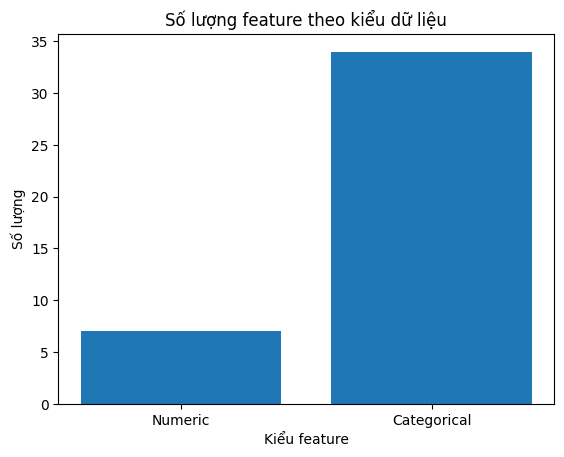

In [19]:
plt.figure()
plt.bar(['Numeric', 'Categorical'], [len(numeric_cols), len(categorical_cols)])
plt.title('Số lượng feature theo kiểu dữ liệu')
plt.xlabel('Kiểu feature')
plt.ylabel('Số lượng')
plt.show()

### Phân bố Target HeartDisease

In [20]:
target_counts = df['HeartDisease'].value_counts()
target_ratio = df['HeartDisease'].value_counts(normalize=True) * 100

target_counts, target_ratio

(HeartDisease
 0    224406
 1     21616
 Name: count, dtype: int64,
 HeartDisease
 0    91.213794
 1     8.786206
 Name: proportion, dtype: float64)

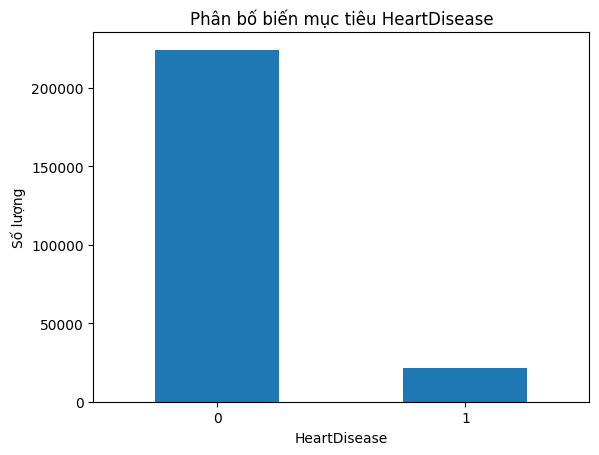

In [21]:
df["HeartDisease"].value_counts().plot(kind="bar")
plt.title("Phân bố biến mục tiêu HeartDisease")
plt.xlabel("HeartDisease")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.show()

* Nhận xét: 

    * Cột HeartDisease = 1 thấp hơn rõ rệt

    * Điều này phản ánh đúng thực tế dịch tễ học:

    * Bệnh tim không phổ biến trong cộng đồng

    * Nhưng tác động rất lớn

#### Tạo cột phân loại có cấu trúc dương

* Vì HeartDisease được tạo từ:

    * HadHeartAttack

    * HadAngina

* Ta cần hiểu:

    * Lớp dương gồm những nhóm nào?

    * Có phải chỉ toàn “case nặng” không?

In [22]:
def hd_type(row):
    if row['HadHeartAttack'] == 'Yes' and row['HadAngina'] == 'Yes':
        return 'Both'
    elif row['HadHeartAttack'] == 'Yes':
        return 'HeartAttack_only'
    elif row['HadAngina'] == 'Yes':
        return 'Angina_only'
    else:
        return 'None'

df['HeartDiseaseType'] = df.apply(hd_type, axis=1)

df[df['HeartDisease'] == 1]['HeartDiseaseType'].value_counts(normalize=True) * 100


HeartDiseaseType
Angina_only         37.846965
Both                31.328645
HeartAttack_only    30.824389
Name: proportion, dtype: float64

* Nhận xét: 

    * Một phần chỉ HeartAttack

    * Một phần chỉ Angina

    * Một phần nhỏ cả hai

* Điều này chứng minh:

    * Composite target không quá hẹp

* Lớp dương gồm cả:

    * case nặng

    * case sớm / tiền lâm sàng

* Đây chính là lý do mô hình:

    * Có thể phát hiện nguy cơ tiềm ẩn

    * Phù hợp cho phân tầng nguy cơ

### AgeCategory

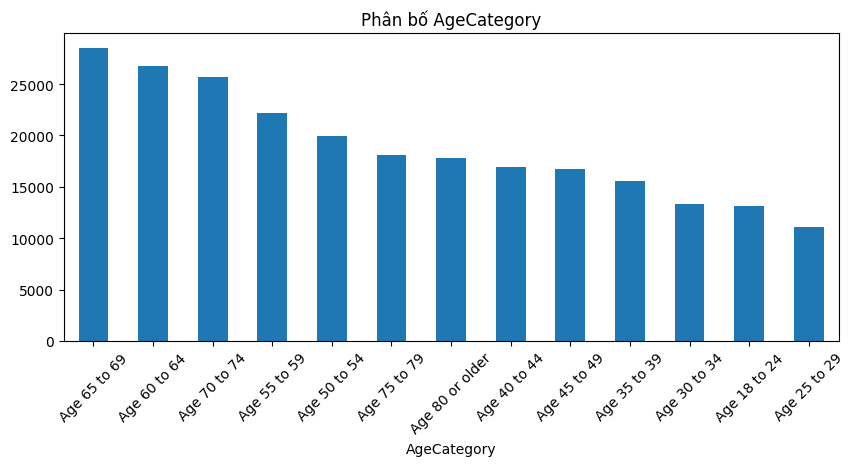

In [23]:
df["AgeCategory"].value_counts().plot(kind="bar", rot=45, figsize=(10,4))
plt.title("Phân bố AgeCategory")
plt.show()

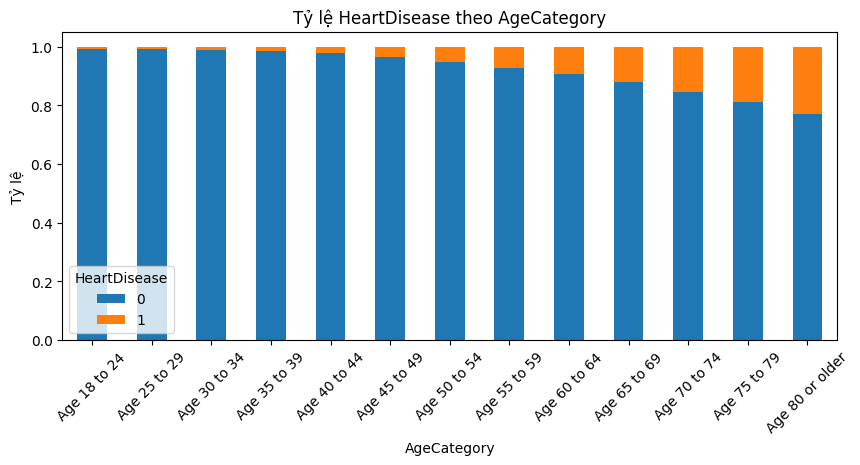

In [24]:
pd.crosstab(
    df["AgeCategory"],
    df["HeartDisease"],
    normalize="index"
).plot(kind="bar", rot=45, stacked=True, figsize=(10,4))
plt.title("Tỷ lệ HeartDisease theo AgeCategory")
plt.ylabel("Tỷ lệ")
plt.show()

### Sex

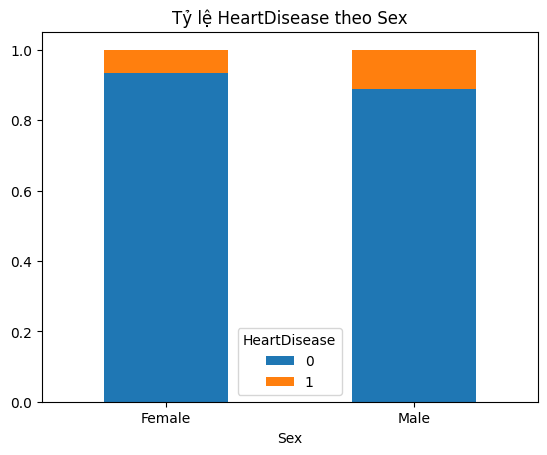

In [25]:
pd.crosstab(
    df["Sex"],
    df["HeartDisease"],
    normalize="index"
).plot(kind="bar", rot=0, stacked=True)
plt.title("Tỷ lệ HeartDisease theo Sex")
plt.show()

### BMI

In [26]:
df['BMI'].describe()

count    246022.000000
mean         28.668136
std           6.513973
min          12.020000
25%          24.270000
50%          27.460000
75%          31.890000
max          97.650000
Name: BMI, dtype: float64

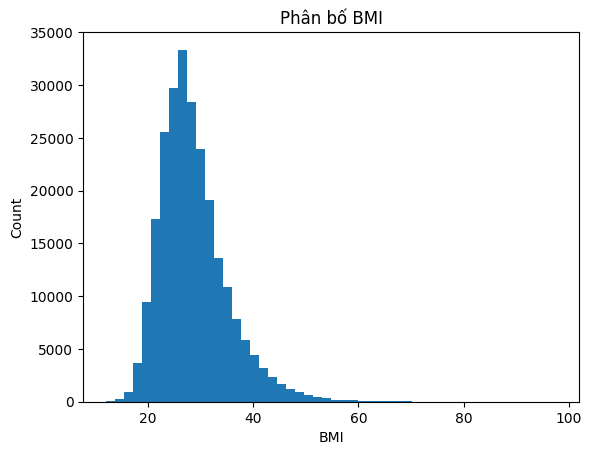

In [27]:
plt.hist(df["BMI"], bins=50)
plt.title("Phân bố BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

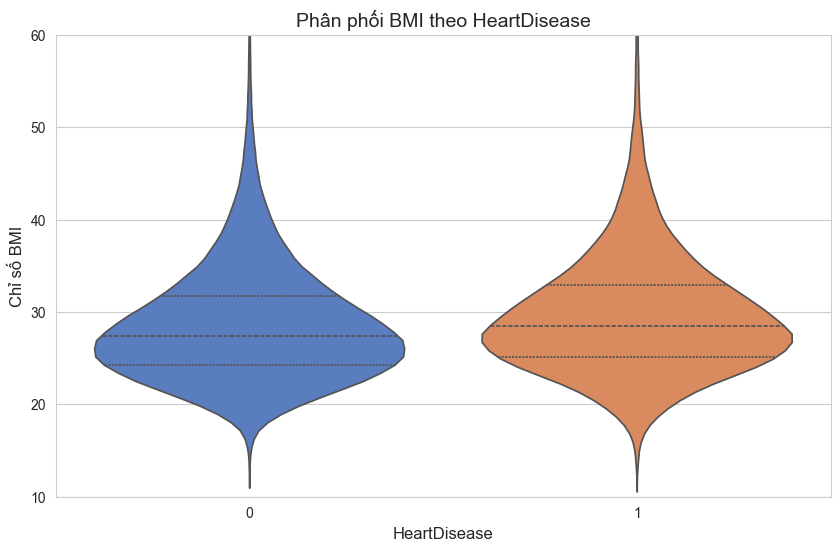

In [28]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.violinplot(
    data=df, 
    x='HeartDisease', 
    y='BMI', 
    hue='HeartDisease',   
    palette="muted", 
    inner="quartile",
    legend=False       
)

plt.title("Phân phối BMI theo HeartDisease", fontsize=14)
plt.xlabel("HeartDisease", fontsize=12)
plt.ylabel("Chỉ số BMI", fontsize=12)

plt.ylim(10, 60)

plt.show()

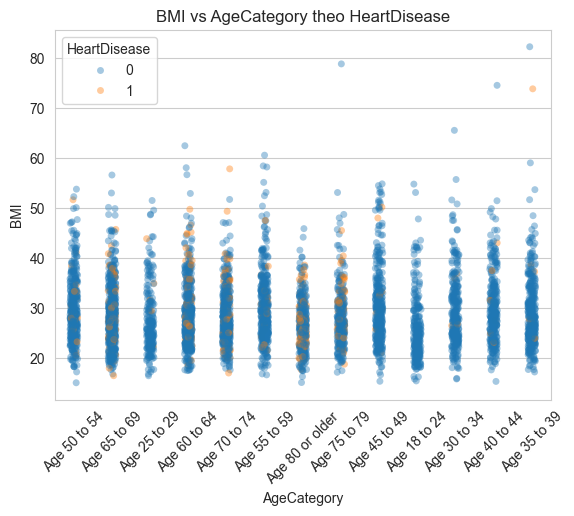

In [29]:
sns.stripplot(
    x="AgeCategory",
    y="BMI",
    hue="HeartDisease",
    data=df.sample(5000, random_state=42),
    jitter=True,
    alpha=0.4
)
plt.xticks(rotation=45)
plt.title("BMI vs AgeCategory theo HeartDisease")
plt.show()

* Nhận xét:

* Với BRFSS, điều thường thấy là:

    * BMI lệch phải nhẹ

    * Một số BMI rất cao nhưng vẫn hợp lý về mặt khảo sát
    
    * BMI là feature liên tục, lành mạnh

    * Có thể cần scaling sau này

    * Chưa cần xử lý outlier ở giai đoạn EDA

### Overlap BMI giữa hai lớp

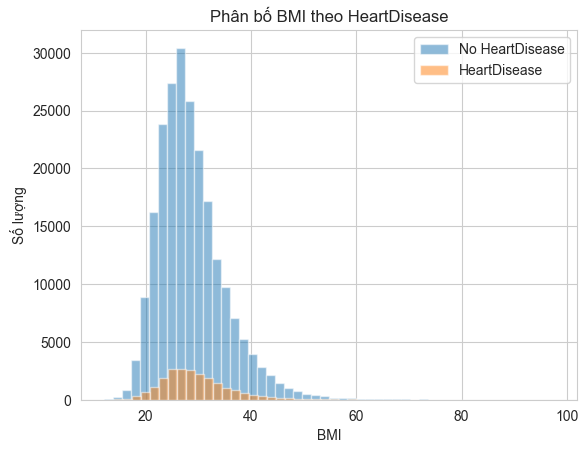

In [30]:
# Histogram chồng BMI theo target
plt.figure()
plt.hist(df[df['HeartDisease'] == 0]['BMI'], bins=50, alpha=0.5, label='No HeartDisease')
plt.hist(df[df['HeartDisease'] == 1]['BMI'], bins=50, alpha=0.5, label='HeartDisease')
plt.title('Phân bố BMI theo HeartDisease')
plt.xlabel('BMI')
plt.ylabel('Số lượng')
plt.legend()
plt.show()

* Nhận xét:

    * Hai phân bố chồng lên nhau rất nhiều

    * Không tồn tại “ngưỡng BMI thần thánh”

* Điều này cực kỳ quan trọng:

    * Không thể nói:

        * BMI > X ⇒ có bệnh tim

    * Nhưng có thể nói:

        * BMI cao + yếu tố khác ⇒ xác suất tăng

* Đây chính là:

    * Lý do bạn dùng xác suất

    * Lý do phân tầng nguy cơ rất hợp lý

### SmokerStatus

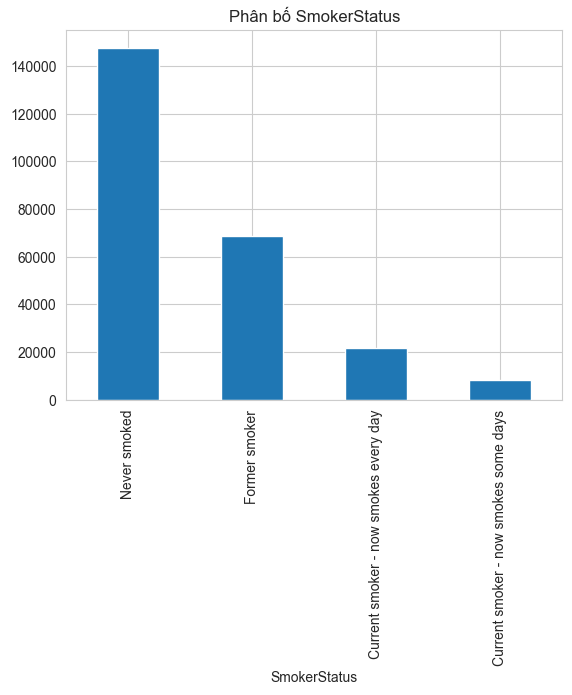

In [31]:
df["SmokerStatus"].value_counts().plot(kind="bar")
plt.title("Phân bố SmokerStatus")
plt.show()

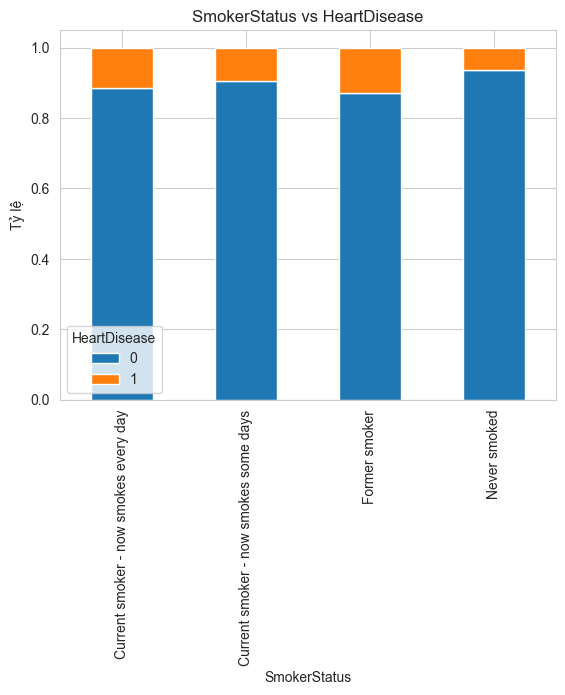

In [32]:
pd.crosstab(
    df["SmokerStatus"],
    df["HeartDisease"],
    normalize="index"
).plot(kind="bar", stacked=True)
plt.title("SmokerStatus vs HeartDisease")
plt.ylabel("Tỷ lệ")
plt.show()

* Nhận xét

    * Người Smoking = Yes có tỷ lệ HeartDisease cao hơn rõ rệt

* Có thể nói Smoking là:

    * Feature rất có giá trị

* Phù hợp cho risk communication

    * Smoking + BMI cao = tổ hợp nguy cơ mạnh

### PhysicalActivities

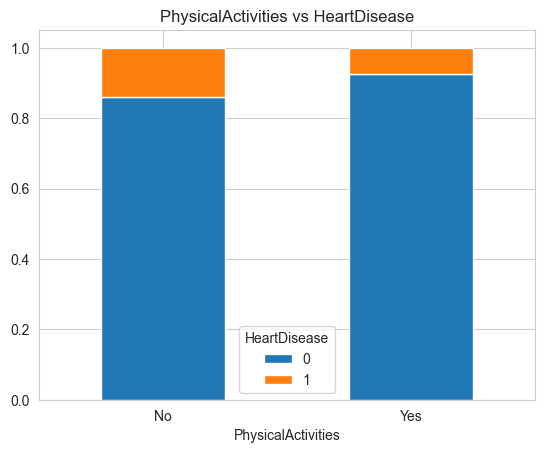

In [33]:
pd.crosstab(
    df["PhysicalActivities"],
    df["HeartDisease"],
    normalize="index"
).plot(kind="bar", rot=0, stacked=True)
plt.title("PhysicalActivities vs HeartDisease")
plt.show()

* Nhận xét:

    * Nhóm không vận động có tỷ lệ HeartDisease cao hơn

    * Nhưng chênh lệch không cực đoan

* PhysicalActivity là:

    * Feature bổ trợ tốt

    * Giúp phân biệt nhóm nguy cơ tiềm ẩn

### SleepHours

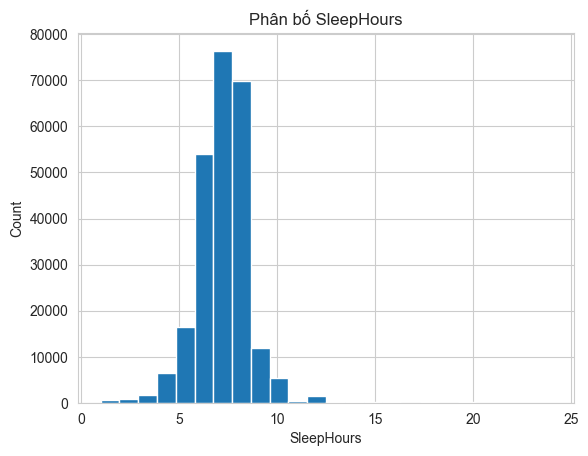

In [34]:
plt.hist(df["SleepHours"], bins=24)
plt.title("Phân bố SleepHours")
plt.xlabel("SleepHours")
plt.ylabel("Count")
plt.show()

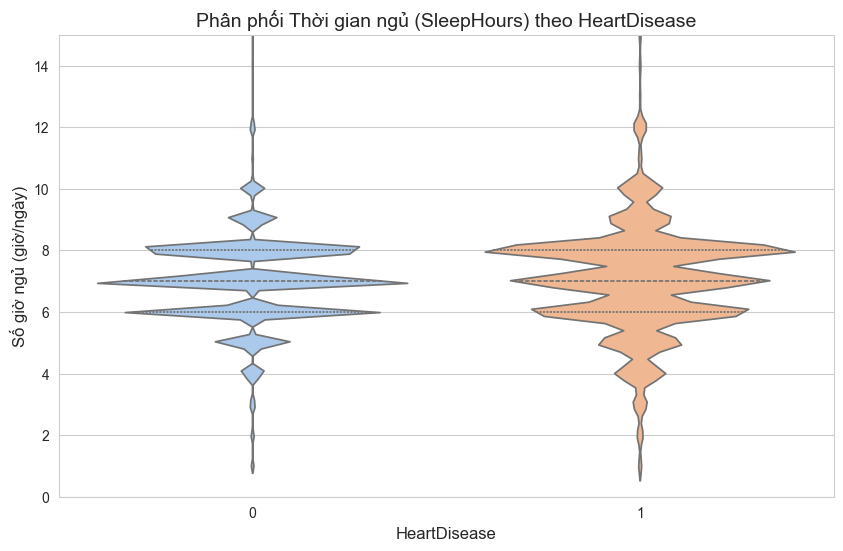

In [35]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.violinplot(
    data=df, 
    x='HeartDisease', 
    y='SleepHours', 
    hue='HeartDisease', 
    palette="pastel",  
    inner="quartile",
    legend=False
)

plt.title("Phân phối Thời gian ngủ (SleepHours) theo HeartDisease", fontsize=14)
plt.xlabel("HeartDisease", fontsize=12)
plt.ylabel("Số giờ ngủ (giờ/ngày)", fontsize=12)

plt.ylim(0, 15)

plt.show()

### AlcoholDrinkers

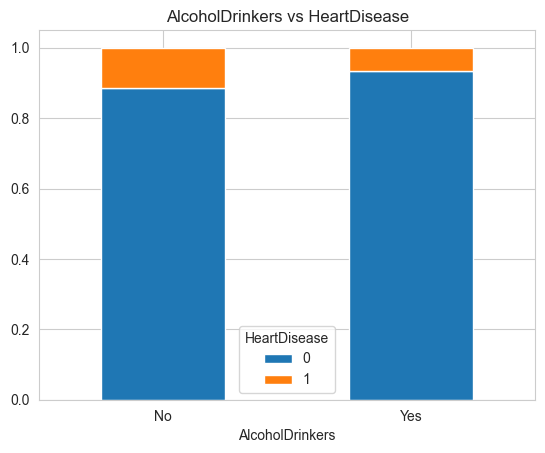

In [36]:
pd.crosstab(
    df["AlcoholDrinkers"],
    df["HeartDisease"],
    normalize="index"
).plot(kind="bar", rot=0, stacked=True)
plt.title("AlcoholDrinkers vs HeartDisease")
plt.show()

### PhysicalHealthDays

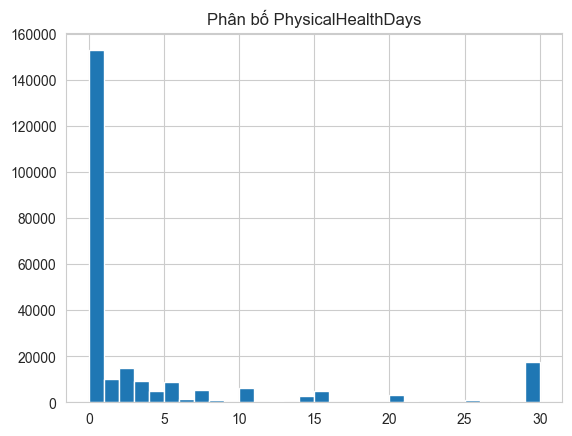

In [37]:
plt.hist(df["PhysicalHealthDays"], bins=30)
plt.title("Phân bố PhysicalHealthDays")
plt.show()

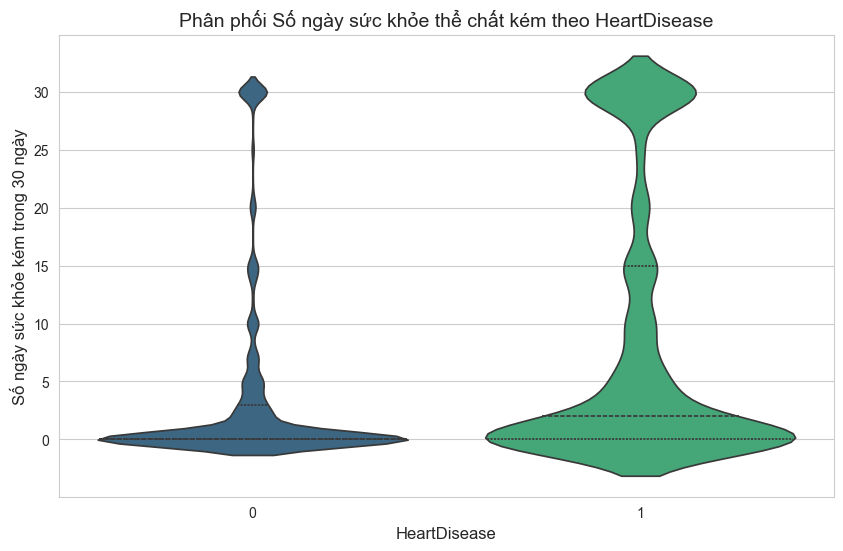

In [38]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.violinplot(
    data=df, 
    x='HeartDisease', 
    y='PhysicalHealthDays', 
    hue='HeartDisease', 
    palette="viridis", 
    inner="quartile",
    legend=False
)

plt.title("Phân phối Số ngày sức khỏe thể chất kém theo HeartDisease", fontsize=14)
plt.xlabel("HeartDisease", fontsize=12)
plt.ylabel("Số ngày sức khỏe kém trong 30 ngày", fontsize=12)

plt.show()

### MentalHealthDays

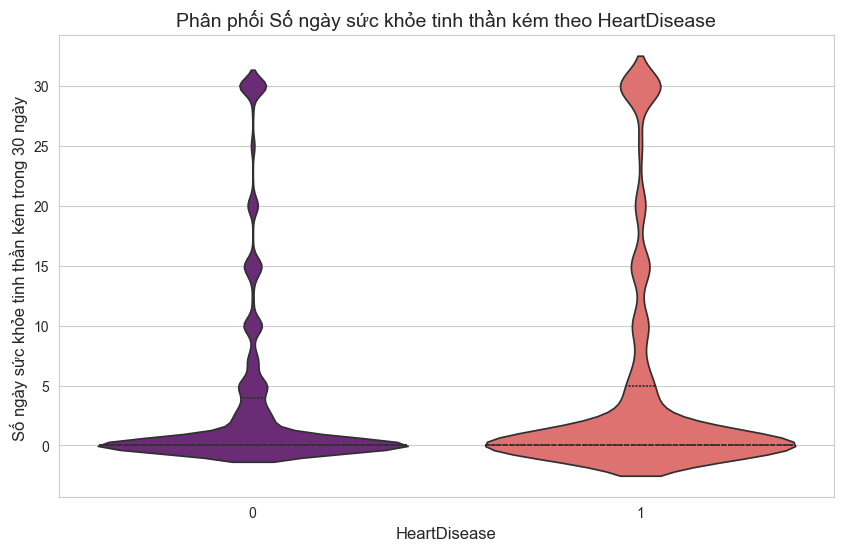

In [39]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.violinplot(
    data=df, 
    x='HeartDisease', 
    y='MentalHealthDays', 
    hue='HeartDisease', 
    palette="magma",   
    inner="quartile",
    legend=False
)

plt.title("Phân phối Số ngày sức khỏe tinh thần kém theo HeartDisease", fontsize=14)
plt.xlabel("HeartDisease", fontsize=12)
plt.ylabel("Số ngày sức khỏe tinh thần kém trong 30 ngày ", fontsize=12)

plt.show()

### GeneralHealth

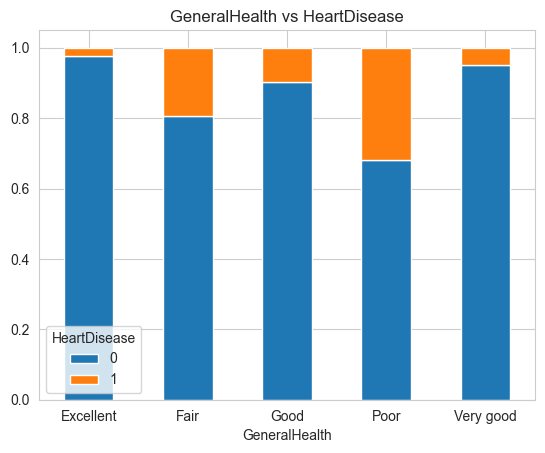

In [40]:
pd.crosstab(
    df["GeneralHealth"],
    df["HeartDisease"],
    normalize="index"
).plot(kind="bar", rot=0, stacked=True)
plt.title("GeneralHealth vs HeartDisease")
plt.show()

### Tiền Xử Bệnh Nền

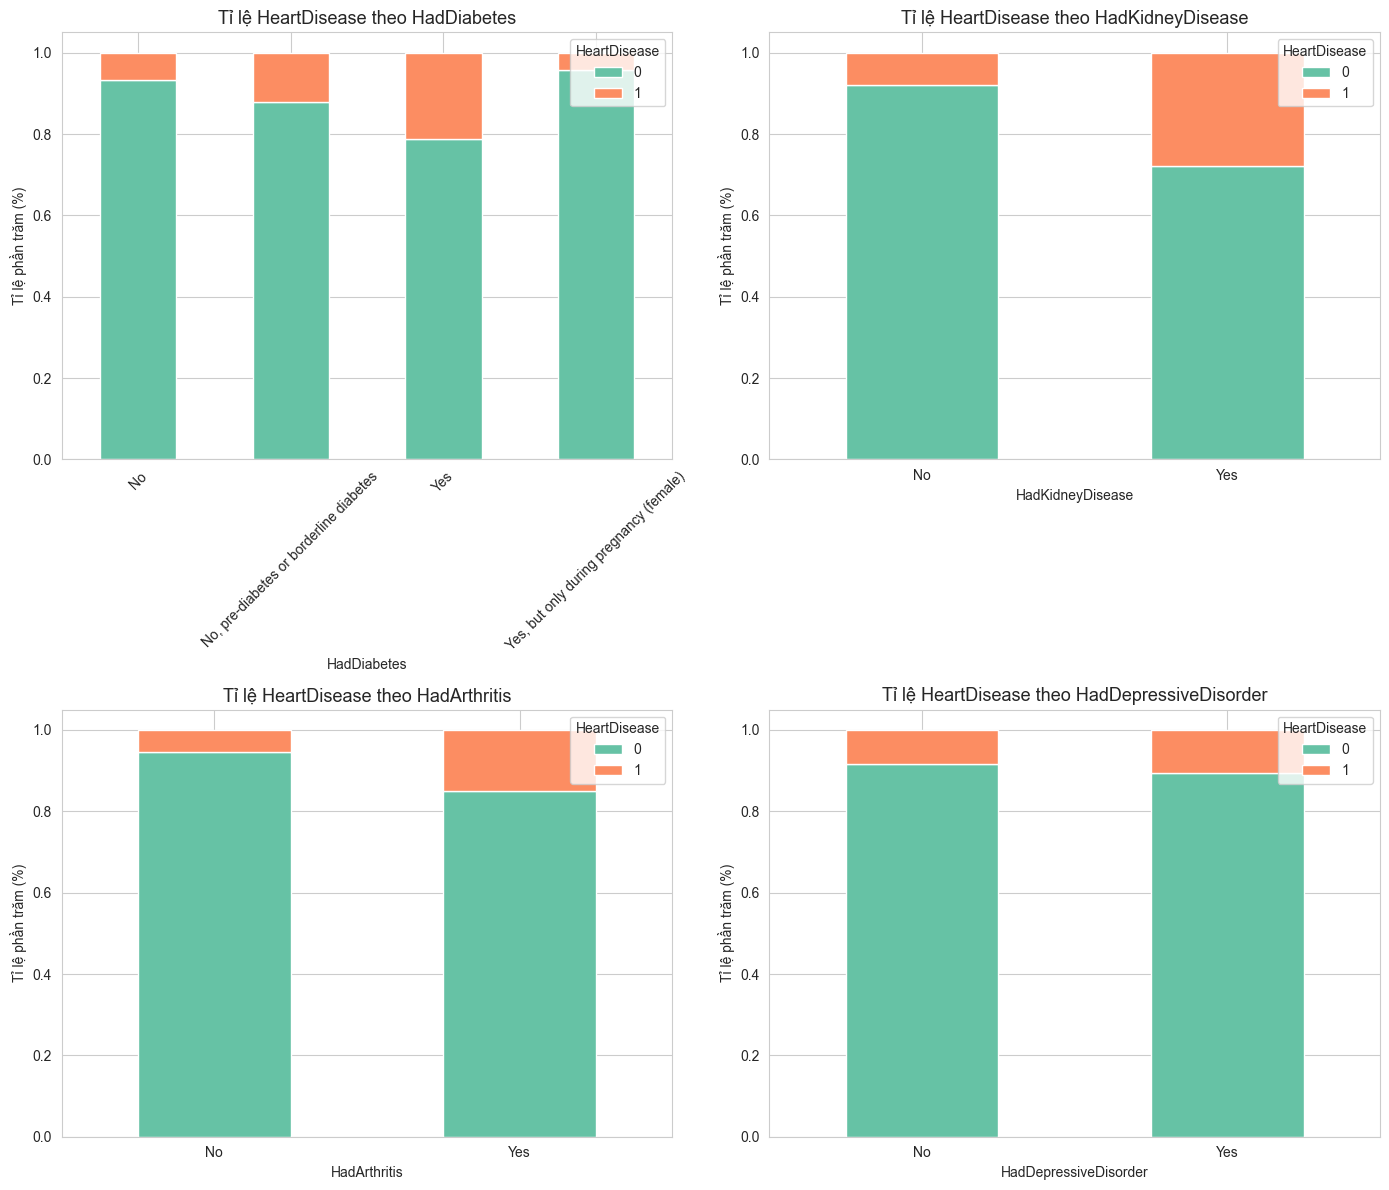

In [41]:
comorbidities = [
    "HadDiabetes",
    "HadKidneyDisease",
    "HadArthritis",
    "HadDepressiveDisorder"
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes_flat = axes.flatten() 

for i, col in enumerate(comorbidities):
    ct = pd.crosstab(df[col], df["HeartDisease"], normalize="index")
    
    ct.plot(kind="bar", stacked=True, ax=axes_flat[i], color=['#66c2a5', '#fc8d62'])
    
    axes_flat[i].set_title(f"Tỉ lệ HeartDisease theo {col}", fontsize=13)

        
    axes_flat[i].set_ylabel("Tỉ lệ phần trăm (%)")
    axes_flat[i].set_xlabel(col)
    axes_flat[i].legend(title="HeartDisease", loc='upper right')
    
    axes_flat[i].tick_params(axis='x', rotation=0)

    if col == "HadDiabetes":
        axes_flat[i].tick_params(axis='x', labelrotation=45)
    else:
        axes_flat[i].tick_params(axis='x', labelrotation=0)


plt.tight_layout()
plt.show()

### Heatmap bệnh nền

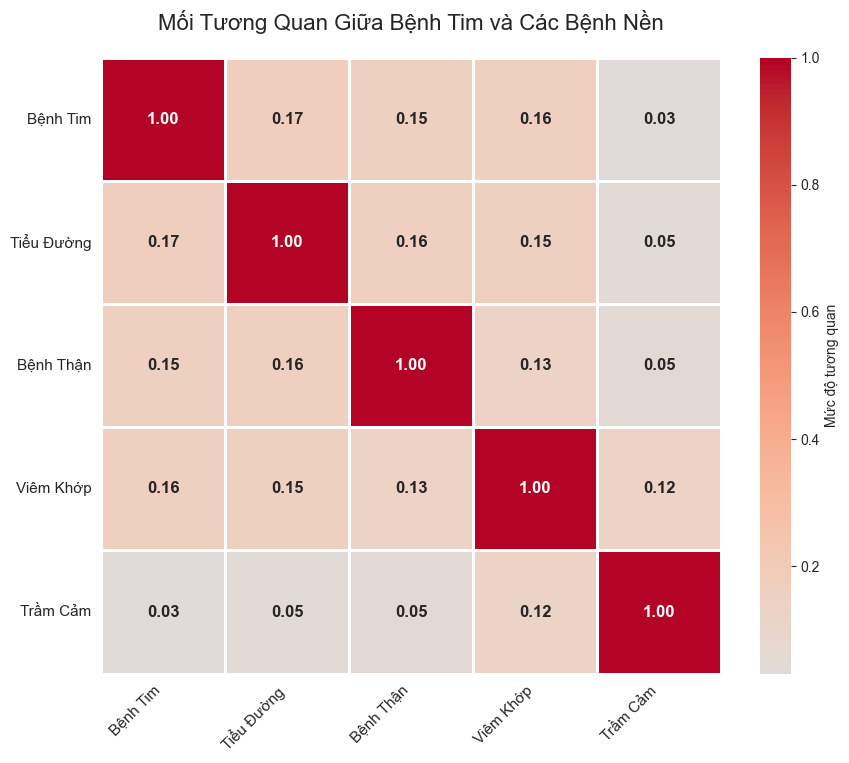

In [42]:
comorbidities = [
    "HadDiabetes",
    "HadKidneyDisease",
    "HadArthritis",
    "HadDepressiveDisorder"
]

df_corr = pd.DataFrame()
df_corr['Bệnh Tim'] = df['HeartDisease'].map({1: 1, 0: 0}) 

mapping = {
    "HadDiabetes": "Tiểu Đường",
    "HadKidneyDisease": "Bệnh Thận",
    "HadArthritis": "Viêm Khớp",
    "HadDepressiveDisorder": "Trầm Cảm"
}

for col, vn_name in mapping.items():
    df_corr[vn_name] = df[col].apply(lambda x: 1 if str(x).startswith('Yes') else 0)

# 2. Tính ma trận tương quan
corr = df_corr.corr()

# 3. Vẽ Heatmap với tùy chỉnh hiển thị
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True,          # Hiển thị số
            fmt=".2f",           # Lấy 2 chữ số thập phân
            cmap="coolwarm",       # Màu Đỏ (Thấp) - Vàng - Xanh (Cao)
            center=0,            # Đặt tâm màu ở giá trị 0
            annot_kws={"size": 12, "weight": "bold"}, # Chỉnh font chữ trong ô
            linewidths=1,        # Tạo đường kẻ giữa các ô
            cbar_kws={'label': 'Mức độ tương quan'})

# Xoay tên các feature để dễ nhìn
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.title("Mối Tương Quan Giữa Bệnh Tim và Các Bệnh Nền", fontsize=16, pad=20)
plt.show()

### Khuyết tật và chức năng

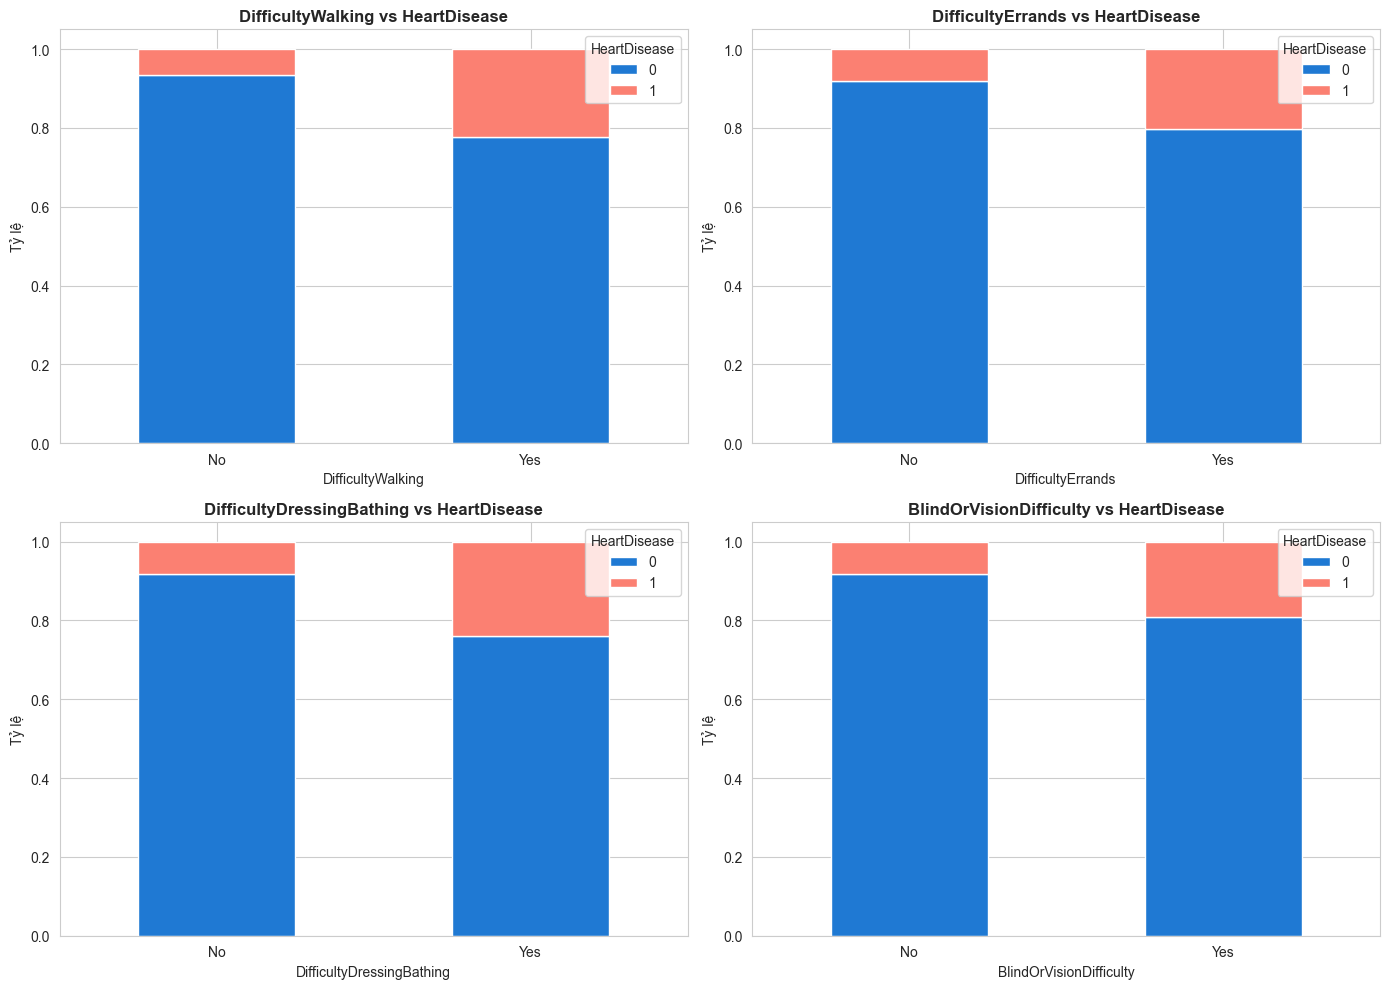

In [43]:
functional_limits = [
    "DifficultyWalking",
    "DifficultyErrands",
    "DifficultyDressingBathing",
    "BlindOrVisionDifficulty"
]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

axes = axes.flatten()

for i, col in enumerate(functional_limits):
    pd.crosstab(
        df[col],
        df["HeartDisease"],
        normalize="index"
    ).plot(kind="bar", stacked=True, ax=axes[i], color=["#1f79d3",'#fb8072'])
    
    axes[i].set_title(f"{col} vs HeartDisease", fontweight='bold')
    axes[i].set_ylabel("Tỷ lệ")
    axes[i].set_xlabel(col)
    axes[i].legend(title="HeartDisease", loc='upper right')
    
    axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Tiếp cận y tế và phòng bệnh

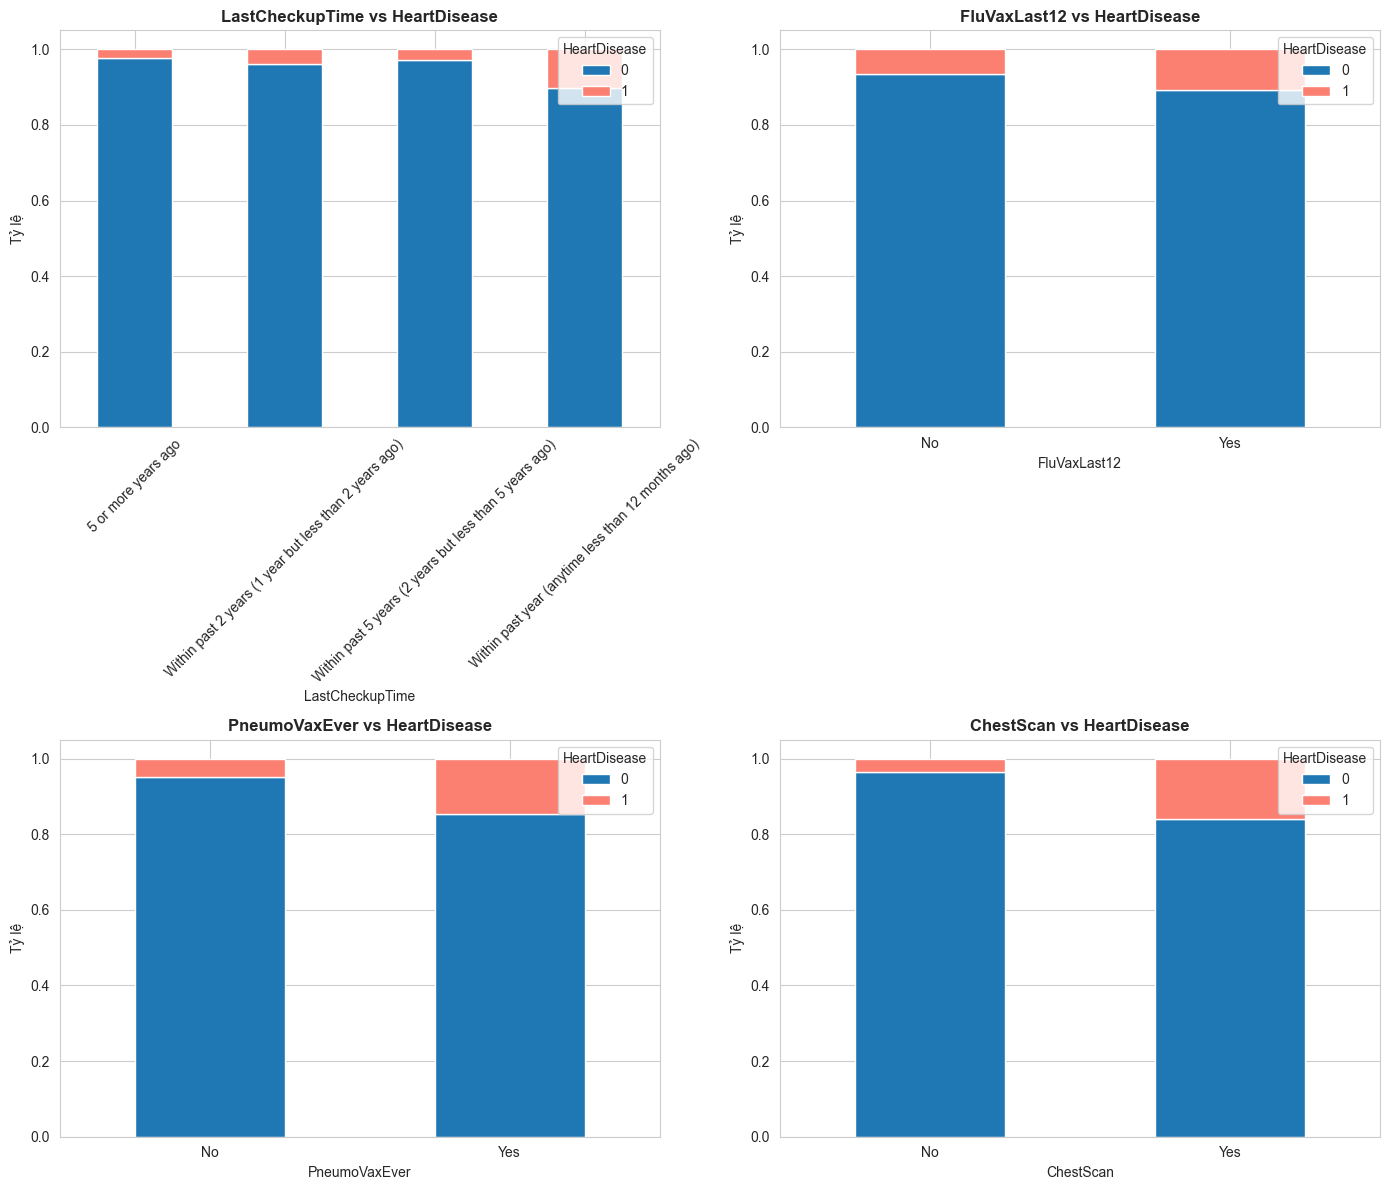

In [44]:
healthcare_features = [
    "LastCheckupTime",
    "FluVaxLast12",
    "PneumoVaxEver",
    "ChestScan",
    "HIVTesting"
]

features_to_plot = healthcare_features[:4] 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
axes = axes.flatten()

colors = ['#1f77b4', '#fb8072']

for i, col in enumerate(features_to_plot):
    pd.crosstab(
        df[col],
        df["HeartDisease"],
        normalize="index"
    ).plot(kind="bar", stacked=True, ax=axes[i], color=colors)
    
    axes[i].set_title(f"{col} vs HeartDisease", fontweight='bold', fontsize=12)
    axes[i].set_ylabel("Tỷ lệ")
    axes[i].legend(title="HeartDisease", loc='upper right')
    
    if col == "LastCheckupTime":
        axes[i].tick_params(axis='x', rotation=45)
    else:
        axes[i].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### Tương quan biến số

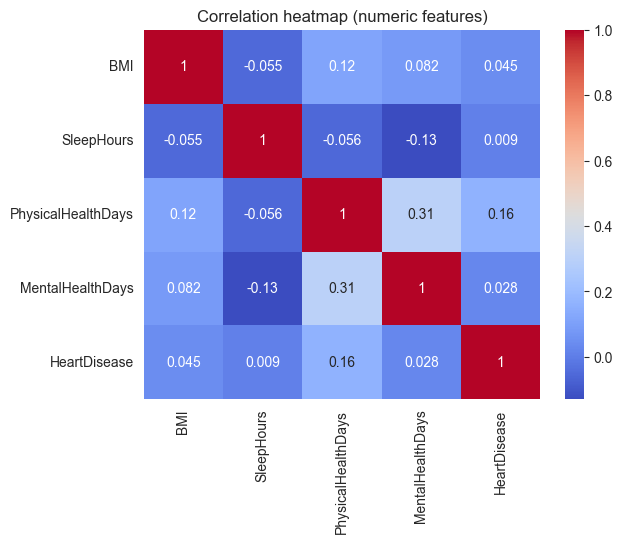

In [45]:
numeric_cols = [
    "BMI",
    "SleepHours",
    "PhysicalHealthDays",
    "MentalHealthDays"
]

corr = df[numeric_cols + ["HeartDisease"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap (numeric features)")
plt.show()

### Tổng quan về Data

1. Tổng quan về Dataset (Dataset Overview)

    * Dataset này là phiên bản đã được làm sạch của dữ liệu BRFSS (Behavioral Risk Factor Surveillance System) năm 2022, tập trung vào các yếu tố nguy cơ liên quan đến bệnh tim mạch.

    * Số lượng bản ghi: 246,022 dòng.

    * Số lượng thuộc tính: 41 cột (bao gồm các đặc trưng và biến mục tiêu).

    * Tình trạng dữ liệu: Dữ liệu đã được xử lý loại bỏ các giá trị thiếu (No NaNs), sẵn sàng cho các bước phân tích và huấn luyện mô hình.



2. Cấu trúc và Phân loại Thuộc tính (Feature Engineering & Selection)

    * Các thuộc tính trong tập dữ liệu có thể được chia thành 4 nhóm chính:

    * Nhóm Nhân khẩu học (Demographics): State, Sex, AgeCategory, RaceEthnicityCategory.

    * Nhóm Chỉ số Hình thể (Physical Stats): HeightInMeters, WeightInKilograms, BMI.

    * Nhóm Thói quen Sinh hoạt (Lifestyle): SmokerStatus, ECigaretteUsage, AlcoholDrinkers, PhysicalActivities, SleepHours.

    * Nhóm Tiền sử Bệnh lý & Sức khỏe (Medical History): HadHeartAttack, HadAngina, HadDiabetes, HadAsthma, GeneralHealth, PhysicalHealthDays, MentalHealthDays, v.v.




3. Phân tích Biến mục tiêu (Target Variable Analysis)

    * Trong bài toán này, biến mục tiêu HeartDisease được xây dựng dựa trên sự xuất hiện của cơn đau tim (HadHeartAttack) hoặc đau thắt ngực (HadAngina).

    * Định nghĩa: HeartDisease = 1 nếu bệnh nhân từng bị đau tim hoặc đau thắt ngực, ngược lại là 0.

    * Phân phối lớp (Class Distribution):

        * Lớp 0 (Không bị bệnh tim): 224,406 bản ghi (~91.21%)

        * Lớp 1 (Có bệnh tim): 21,616 bản ghi (~8.79%)

Nhận xét: Việc gộp hai chỉ số này giúp phản ánh đầy đủ hơn tình trạng sức khỏe tim mạch của bệnh nhân. Tuy nhiên, tập dữ liệu vẫn ở trạng thái mất cân bằng (Imbalanced). Tỷ lệ lớp thiểu số đã tăng từ ~5.4% lên ~8.8%, giúp mô hình có thêm dữ liệu để học về các trường hợp bệnh lý so với khi chỉ dùng duy nhất HadHeartAttack.



4. Nhận xét về Đặc trưng Dữ liệu & Tiền xử lý (Feature Insights)

    * Mối tương quan: Biến HeartDisease mới này có sự liên kết chặt chẽ với các nhóm yếu tố nguy cơ như:

    * Tuổi tác: Tần suất xuất hiện bệnh tim thường tăng mạnh ở các nhóm AgeCategory từ 65 trở lên.

        * Sức khỏe nền: Các biến HadDiabetes, HadCOPD, và GeneralHealth (mức Poor/Fair) dự kiến sẽ là những đặc trưng có trọng số cao nhất.

    * Yêu cầu xử lý dữ liệu:

        * Encoding: Cần thực hiện Label Encoding cho các biến nhị phân (Yes/No) và One-Hot Encoding cho các biến đa danh mục như RaceEthnicityCategory hoặc SmokerStatus.

        * Feature Scaling: Các đặc trưng số như BMI, WeightInKilograms, PhysicalHealthDays cần được chuẩn hóa để tránh việc các biến có đơn vị lớn lấn át các biến khác.

        * Xử lý mất cân bằng: Do tỷ lệ 91:9, các chỉ số đánh giá như Precision-Recall Curve và F1-Score sẽ quan trọng hơn Accuracy để đánh giá khả năng nhận diện bệnh nhân có nguy cơ cao.

### Chọn Feature

In [46]:
TARGET = "HeartDisease"

screening_features = [
    "AgeCategory",          # 1. Yếu tố nguy cơ mạnh nhất
    "BMI",                  # 2. Core feature theo yêu cầu của bạn
    "GeneralHealth",        # 3. Proxy mạnh nhất cho huyết áp, cholesterol, sức khỏe tổng quát
    "Sex",                  # 4. Yếu tố sinh học cơ bản
    "SmokerStatus",         # 5. Hút thuốc – nguy cơ hàng đầu có thể thay đổi
    "PhysicalActivities",   # 6. Thiếu vận động kết hợp BMI = risk rất cao
    "SleepHours",           # 7. Giấc ngủ kém liên quan stress, viêm
    "HadDiabetes",          # 8. Tiểu đường – đồng mắc mạnh nhất
    "ChestScan",            # 9. Tín hiệu sàng lọc cực mạnh (từng nghi ngờ tim/phổi)
    "AlcoholDrinkers",      # 10. Uống rượu nặng tăng huyết áp
    "HadArthritis"          # 11. Viêm mãn tính đồng mắc với xơ vữa mạch vành
]

missing_cols = [col for col in screening_features + [TARGET] if col not in df.columns]
if missing_cols:
    raise ValueError(f"Các cột sau không tồn tại trong dataset: {missing_cols}")

df_clean = df[screening_features + [TARGET]].copy()

print(f"Dataset sau khi chọn feature: {df_clean.shape}")
print(f"\nPhân bố target HeartDisease:")
print(df_clean[TARGET].value_counts(normalize=True).round(4))

X = df_clean[screening_features]
y = df_clean[TARGET]

Dataset sau khi chọn feature: (246022, 12)

Phân bố target HeartDisease:
HeartDisease
0    0.9121
1    0.0879
Name: proportion, dtype: float64


#### Oulier

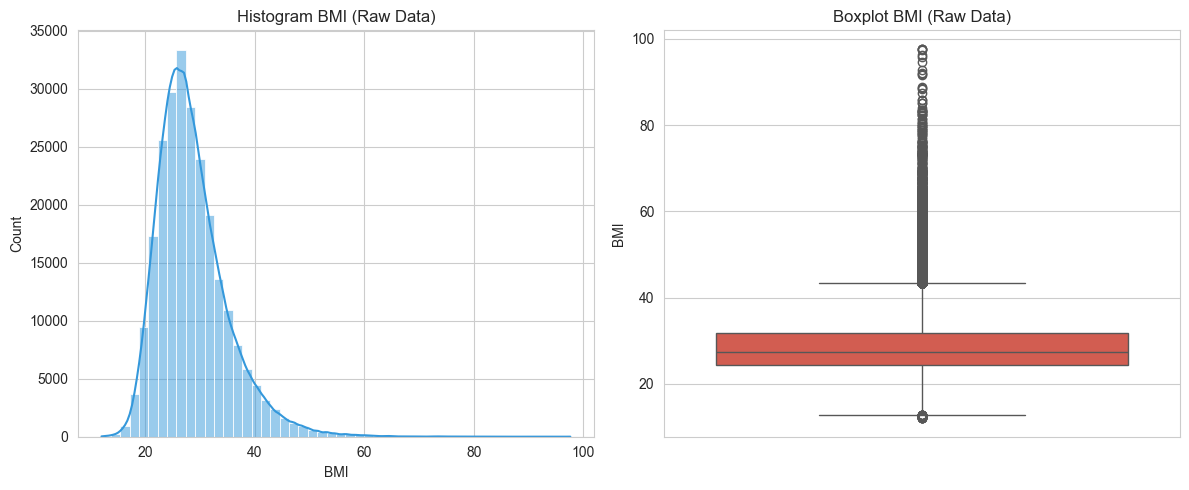

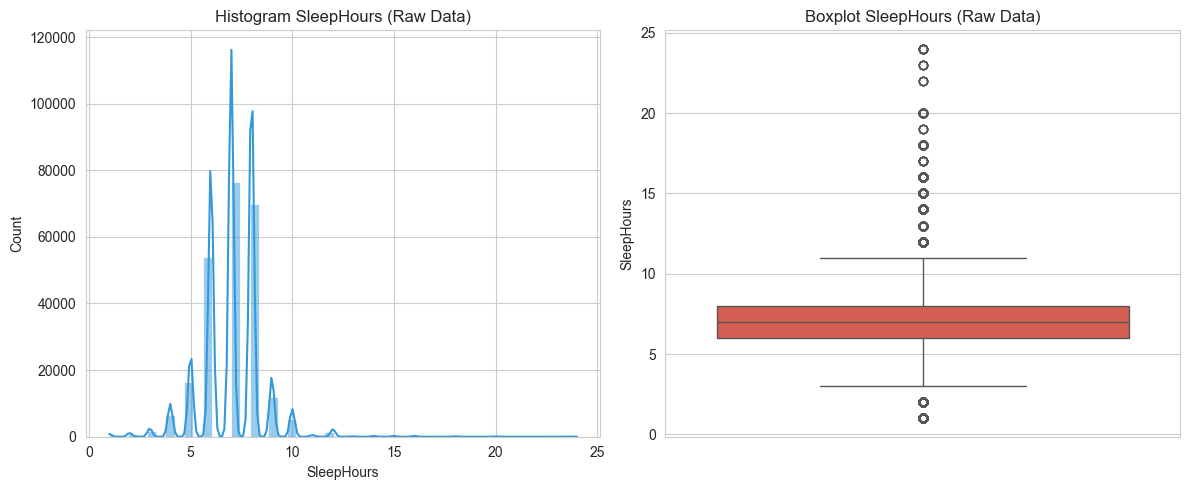

Thống kê numerical features (raw):


,BMI,SleepHours
count,246022.000000,246022.000000
mean,28.668136,7.021331
std,6.513973,1.440681
min,12.020000,1.000000
1%,17.970000,3.000000
5%,20.340000,5.000000
50%,27.460000,7.000000
95%,40.720000,9.000000
99%,49.380000,11.000000
max,97.650000,24.000000


In [47]:
numeric_features = ["BMI", "SleepHours"]

for col in numeric_features:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df_clean[col], kde=True, color="#3498db", bins=50)
    plt.title(f"Histogram {col} (Raw Data)")
    plt.xlabel(col)
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_clean[col], color="#e74c3c")
    plt.title(f"Boxplot {col} (Raw Data)")
    
    plt.tight_layout()
    plt.show()

print("Thống kê numerical features (raw):")
display(df_clean[numeric_features].describe(percentiles=[0.01, 0.05, 0.95, 0.99]))

## Tiền Xử Lý Dữ Liệu

### Kiểm tra dữ liệu trùng lặp

In [48]:
print(f"Số dòng trước khi loại trùng: {df_clean.shape[0]}")

df_clean = df_clean.drop_duplicates()

print(f"Số dòng sau khi loại trùng: {df_clean.shape[0]}")
print(f"Đã loại bỏ {df_clean.duplicated().sum()} dòng trùng lặp\n")

Số dòng trước khi loại trùng: 246022
Số dòng sau khi loại trùng: 228510
Đã loại bỏ 0 dòng trùng lặp



In [49]:
df['AgeCategory'].unique()

array(['Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older',
       'Age 50 to 54', 'Age 40 to 44', 'Age 60 to 64', 'Age 55 to 59',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24'], dtype=object)

In [50]:
age_map = {
    'Age 18 to 24': '18-24',
    'Age 25 to 29': '25-29',
    'Age 30 to 34': '30-34',
    'Age 35 to 39': '35-39',
    'Age 40 to 44': '40-44',
    'Age 45 to 49': '45-49',
    'Age 50 to 54': '50-54',
    'Age 55 to 59': '55-59',
    'Age 60 to 64': '60-64',
    'Age 65 to 69': '65-69',
    'Age 70 to 74': '70-74',
    'Age 75 to 79': '75-79',
    'Age 80 or older': '80 or older'
}

df_clean["AgeCategory"] = df_clean["AgeCategory"].map(age_map).fillna(df_clean["AgeCategory"])

print("AgeCategory sau khi chuẩn hóa:")
print(sorted(df_clean["AgeCategory"].unique()))

AgeCategory sau khi chuẩn hóa:
['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']


#### Feature Engineering

In [51]:
df_clean['BMI_cat'] = pd.cut(
    df_clean['BMI'],
    bins=[0, 18.5, 25, 30, float('inf')],
    labels=[0, 1, 2, 3],  # 0: Underweight, 1: Normal, 2: Overweight, 3: Obese
    include_lowest=True
).astype(int)

# 3.2 Sleep risk (ngủ <6h hoặc >9h → nguy cơ cao)
df_clean['Sleep_risk'] = ((df_clean['SleepHours'] < 6) | (df_clean['SleepHours'] > 9)).astype(int)

print("Feature engineering hoàn tất:")
print(f"- BMI_cat value counts:\n{df_clean['BMI_cat'].value_counts().sort_index()}")
print(f"- Sleep_risk ratio: {df_clean['Sleep_risk'].mean():.2%} có nguy cơ giấc ngủ kém\n")

Feature engineering hoàn tất:
- BMI_cat value counts:
BMI_cat
0     3716
1    64099
2    79034
3    81661
Name: count, dtype: int64
- Sleep_risk ratio: 14.72% có nguy cơ giấc ngủ kém



### Encoding 

In [52]:
binary_cols = ["PhysicalActivities", "AlcoholDrinkers", "ChestScan", "HadArthritis", "Sleep_risk"]

for col in binary_cols:
    if col in df_clean.columns:
        df_clean[col] = (df_clean[col] == "Yes").astype(int)

print("Binary columns đã được chuyển sang 0/1:")
display(df_clean[binary_cols].head())

Binary columns đã được chuyển sang 0/1:


,PhysicalActivities,AlcoholDrinkers,ChestScan,HadArthritis,Sleep_risk
0,1,0,0,1,0
1,1,0,0,1,0
2,0,1,1,1,0
3,1,0,0,1,0
4,1,0,0,1,0


#### Cập nhật danh sách features

In [53]:
TARGET = "HeartDisease"

final_features = [
    "AgeCategory", "GeneralHealth", "Sex", "SmokerStatus",
    "PhysicalActivities", "HadDiabetes", "ChestScan",
    "AlcoholDrinkers", "HadArthritis",
    "BMI_cat", "Sleep_risk"      
]

X = df_clean[final_features]
y = df_clean[TARGET]

ordinal_features = [
    "AgeCategory", 
    "GeneralHealth", 
    "BMI_cat"]   
        
nominal_features = [
    "Sex", 
    "SmokerStatus", 
    "HadDiabetes"]        
        
binary_features  = [
    "PhysicalActivities", 
    "AlcoholDrinkers",
    "ChestScan", 
    "HadArthritis", 
    "Sleep_risk"]           

print(f"Tổng số features đưa vào model: {len(final_features)} (giảm redundancy)")
print(f"- Ordinal : {ordinal_features}")
print(f"- Nominal : {nominal_features}")
print(f"- Binary  : {binary_features}")

Tổng số features đưa vào model: 11 (giảm redundancy)
- Ordinal : ['AgeCategory', 'GeneralHealth', 'BMI_cat']
- Nominal : ['Sex', 'SmokerStatus', 'HadDiabetes']
- Binary  : ['PhysicalActivities', 'AlcoholDrinkers', 'ChestScan', 'HadArthritis', 'Sleep_risk']


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# 6.1 Ordinal Encoder với thứ tự rõ ràng
age_order = [
    "18-24", "25-29", "30-34", "35-39", "40-44",
    "45-49", "50-54", "55-59", "60-64", "65-69",
    "70-74", "75-79", "80 or older"
]

general_health_order = ["Excellent", "Very good", "Good", "Fair", "Poor"]

bmi_cat_order = [0, 1, 2, 3]  

ordinal_pipeline = Pipeline(steps=[
    ("ordinal_encoder", OrdinalEncoder(
        categories=[age_order, general_health_order, bmi_cat_order],
        handle_unknown="use_encoded_value",
        unknown_value=-1
    ))
])

# 6.2 OneHot Encoder cho nominal features
nominal_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(
        handle_unknown="ignore",  
        sparse_output=False        
    ))
])

binary_pipeline = "passthrough"

# 6.4 ColumnTransformer tổng hợp
preprocessor = ColumnTransformer(
    transformers=[
        ("ordinal", ordinal_pipeline, ordinal_features),
        ("nominal", nominal_pipeline, nominal_features),
        ("binary",  binary_pipeline,  binary_features)
    ],
    remainder="drop",               
    verbose_feature_names_out=False 
)

# Kiểm tra số lượng features sau encoding (trên vài mẫu)
print("Preprocessor đã được xây dựng thành công!")

Preprocessor đã được xây dựng thành công!


### Split Data

#### 1. Tách Test Set (20%)

In [55]:
TARGET = "HeartDisease"

X = df_clean[final_features]
y = df_clean[TARGET]

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("Train & Validation: ", X_temp.shape)
print("Test: ", X_test.shape)

Train & Validation:  (182808, 11)
Test:  (45702, 11)


#### 2. Tách Train & Validation (64% / 16%)

In [56]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.25,   
    random_state=42,
    stratify=y_temp
)

print("Train: ", X_train.shape)
print("Validation: ", X_val.shape)

Train:  (137106, 11)
Validation:  (45702, 11)


#### 3. Kiểm Tra

In [57]:
def check_target_ratio(y, name):
    print(f"{name}:")
    print(y.value_counts(normalize=True))
    print("-" * 40)

check_target_ratio(y_train, "TRAIN")
check_target_ratio(y_val, "VALIDATION")
check_target_ratio(y_test, "TEST")

TRAIN:
HeartDisease
0    0.905883
1    0.094117
Name: proportion, dtype: float64
----------------------------------------
VALIDATION:
HeartDisease
0    0.90589
1    0.09411
Name: proportion, dtype: float64
----------------------------------------
TEST:
HeartDisease
0    0.90589
1    0.09411
Name: proportion, dtype: float64
----------------------------------------


## Huấn Luyện Và Đánh Giá Mô Hình

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

#### Metrics

In [59]:
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix - Heart Disease Risk Screening", threshold=None):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    
    cm = confusion_matrix(y_true, y_pred)
    
    cm_df = pd.DataFrame(
        cm,
        index=["Actual: Low Risk", "Actual: High Risk"],
        columns=["Predicted: Low Risk", "Predicted: High Risk"]
    )
    
    print("=== Confusion Matrix (Heart Disease Risk Screening) ===")
    display(cm_df)
    
    plt.figure(figsize=(7, 5.5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={"shrink": 0.8},
        xticklabels=["Low Risk", "High Risk"],
        yticklabels=["Low Risk", "High Risk"]
    )
    
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("Actual Label", fontsize=12)
    
    if threshold is not None:
        title = f"{title}\n(Threshold = {threshold:.3f})"
    
    plt.title(title, fontsize=14, fontweight="bold", pad=20)
    plt.tight_layout()
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negatives  (Low Risk đúng):      {tn:,}")
    print(f"False Positives (Cảnh báo nhầm):       {fp:,}")
    print(f"False Negatives (Bỏ sót nguy cơ cao): {fn:,}")
    print(f"True Positives  (Phát hiện đúng):      {tp:,}")

## Mô hình 1: Logistic Regression

### 1. Mục tiêu & lý do chọn mô hình
Logistic Regression được sử dụng làm mô hình baseline cho bài toán
phân loại nhị phân trong y tế do tính đơn giản, ổn định
và khả năng diễn giải tốt.


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline


#### Mô Hình không sử lí mất cân bằng dữ liệu

In [61]:
logreg_baseline = LogisticRegression(
    max_iter=1000,
    random_state=42
)

pipeline_baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", logreg_baseline)
])

param_grid = {
    "model__C": [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    "model__solver": ["lbfgs", "liblinear"]
}

grid_baseline = GridSearchCV(
    pipeline_baseline,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

grid_baseline.fit(X_train, y_train)

best_model_baseline = grid_baseline.best_estimator_

print("=== Logistic Regression (No Imbalance Handling) ===")
print("Best params:", grid_baseline.best_params_)
print(f"Best CV F1-score: {grid_baseline.best_score_:.4f}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
=== Logistic Regression (No Imbalance Handling) ===
Best params: {'model__C': 10.0, 'model__solver': 'lbfgs'}
Best CV F1-score: 0.1135


In [62]:
y_val_proba_base = best_model_baseline.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.10, 0.71, 0.02)
results_base = []

for t in thresholds:
    y_pred = (y_val_proba_base >= t).astype(int)
    results_base.append({
        "Threshold": round(t, 2),
        "Recall": recall_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred, zero_division=0),
        "F1": f1_score(y_val, y_pred, zero_division=0)
    })

df_threshold_base = pd.DataFrame(results_base)
best_t_base = df_threshold_base.loc[df_threshold_base["F1"].idxmax(), "Threshold"]

print(f"Best Threshold (Baseline): {best_t_base}")
display(df_threshold_base)

Best Threshold (Baseline): 0.18


,Threshold,Recall,Precision,F1
0,0.10,0.764241,0.234067,0.358373
1,0.12,0.714252,0.255723,0.376609
2,0.14,0.664032,0.274933,0.388862
3,0.16,0.609858,0.294885,0.397545
4,0.18,0.562660,0.309107,0.399011
5,0.20,0.504766,0.324417,0.394979
6,0.22,0.462451,0.342164,0.393316
7,0.24,0.414555,0.358680,0.384599
8,0.26,0.372472,0.372992,0.372732
9,0.28,0.332016,0.389738,0.358569


#### Test-Set

=== Logistic Regression (Baseline) - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,36009,5392
Actual: High Risk,1886,2415


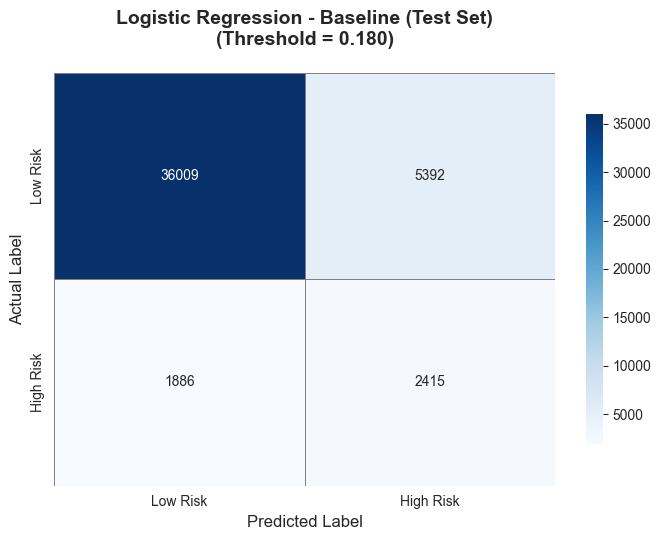

True Negatives  (Low Risk đúng):      36,009
False Positives (Cảnh báo nhầm):       5,392
False Negatives (Bỏ sót nguy cơ cao): 1,886
True Positives  (Phát hiện đúng):      2,415

--- Performance Metrics ---
Recall: 0.5615
Precision: 0.3093
F1-score: 0.3989
ROC-AUC: 0.8300


In [63]:
y_test_proba_base = best_model_baseline.predict_proba(X_test)[:, 1]
y_test_pred_base = (y_test_proba_base >= best_t_base).astype(int)

print("=== Logistic Regression (Baseline) - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_base,
    title="Logistic Regression - Baseline (Test Set)",
    threshold=best_t_base
)

metrics_base_test = {
    "Recall": recall_score(y_test, y_test_pred_base),
    "Precision": precision_score(y_test, y_test_pred_base, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_base, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_base)
}

print("\n--- Performance Metrics ---")
for k, v in metrics_base_test.items():
    print(f"{k}: {v:.4f}")

#### Mô Hình có xử lí mất cân bằng dữ liệu

In [64]:
logreg_balanced = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

pipeline_balanced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", logreg_balanced)
])

grid_balanced = GridSearchCV(
    pipeline_balanced,
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

grid_balanced.fit(X_train, y_train)

best_model_balanced = grid_balanced.best_estimator_

print("=== Logistic Regression + class_weight ===")
print("Best params:", grid_balanced.best_params_)
print(f"Best CV F1-score: {grid_balanced.best_score_:.4f}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits
=== Logistic Regression + class_weight ===
Best params: {'model__C': 0.01, 'model__solver': 'lbfgs'}
Best CV F1-score: 0.3545


In [65]:
y_val_proba_bal = best_model_balanced.predict_proba(X_val)[:, 1]

results_bal = []

for t in thresholds:
    y_pred = (y_val_proba_bal >= t).astype(int)
    results_bal.append({
        "Threshold": round(t, 2),
        "Recall": recall_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred, zero_division=0),
        "F1": f1_score(y_val, y_pred, zero_division=0)
    })

df_threshold_bal = pd.DataFrame(results_bal)
best_t_bal = df_threshold_bal.loc[df_threshold_bal["F1"].idxmax(), "Threshold"]

print(f"Best Threshold (class_weight): {best_t_bal}")
display(df_threshold_bal)

Best Threshold (class_weight): 0.66


,Threshold,Recall,Precision,F1
0,0.10,0.989537,0.116923,0.209135
1,0.12,0.984655,0.122152,0.217341
2,0.14,0.980237,0.127245,0.225250
3,0.16,0.973030,0.132269,0.232882
4,0.18,0.967914,0.137067,0.240129
5,0.20,0.960707,0.143030,0.248991
6,0.22,0.956057,0.147834,0.256072
7,0.24,0.948617,0.153852,0.264763
8,0.26,0.941176,0.158826,0.271787
9,0.28,0.933271,0.163690,0.278528


=== Logistic Regression (class_weight='balanced') - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,35351,6050
Actual: High Risk,1721,2580


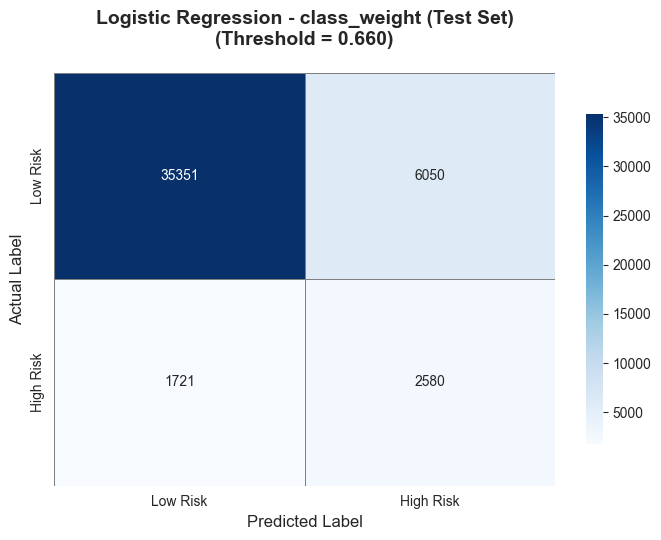

True Negatives  (Low Risk đúng):      35,351
False Positives (Cảnh báo nhầm):       6,050
False Negatives (Bỏ sót nguy cơ cao): 1,721
True Positives  (Phát hiện đúng):      2,580

--- Performance Metrics ---
Recall: 0.5999
Precision: 0.2990
F1-score: 0.3990
ROC-AUC: 0.8300


In [66]:
y_test_proba_bal = best_model_balanced.predict_proba(X_test)[:, 1]
y_test_pred_bal = (y_test_proba_bal >= best_t_bal).astype(int)

print("=== Logistic Regression (class_weight='balanced') - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_bal,
    title="Logistic Regression - class_weight (Test Set)",
    threshold=best_t_bal
)

metrics_bal_test = {
    "Recall": recall_score(y_test, y_test_pred_bal),
    "Precision": precision_score(y_test, y_test_pred_bal, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_bal, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_bal)
}

print("\n--- Performance Metrics ---")
for k, v in metrics_bal_test.items():
    print(f"{k}: {v:.4f}")

#### So Sánh Hai Phiên Bản 

In [67]:
comparison_lr = pd.DataFrame({
    "Model": [
        "Logistic Regression (Baseline)",
        "Logistic Regression (class_weight)"
    ],
    "Best Threshold": [
        best_t_base,
        best_t_bal
    ],
    "Recall": [
        metrics_base_test["Recall"],
        metrics_bal_test["Recall"]
    ],
    "Precision": [
        metrics_base_test["Precision"],
        metrics_bal_test["Precision"]
    ],
    "F1-score": [
        metrics_base_test["F1-score"],
        metrics_bal_test["F1-score"]
    ],
    "ROC-AUC": [
        metrics_base_test["ROC-AUC"],
        metrics_bal_test["ROC-AUC"]
    ]
})

print("=== SO SÁNH LOGISTIC REGRESSION TRÊN TẬP TEST ===")

display(
    comparison_lr.style
    .format({
        "Best Threshold": "{:.2f}",
        "Recall": "{:.3f}",
        "Precision": "{:.3f}",
        "F1-score": "{:.3f}",
        "ROC-AUC": "{:.3f}"
    })
    .highlight_max(subset=["Recall", "F1-score"], color="lightgreen")
)


=== SO SÁNH LOGISTIC REGRESSION TRÊN TẬP TEST ===


,Model,Best Threshold,Recall,Precision,F1-score,ROC-AUC
0,Logistic Regression (Baseline),0.18,0.561,0.309,0.399,0.830
1,Logistic Regression (class_weight),0.66,0.600,0.299,0.399,0.830


### Nguyên tắc chọn threshold có căn cứ (Recall-priority)

Trong bài toán sàng lọc nguy cơ bệnh tim, chi phí của các loại sai lệch
không tương đương. Việc bỏ sót bệnh nhân nguy cơ cao (False Negative)
có thể dẫn đến hậu quả nghiêm trọng do không được can thiệp y tế kịp thời,
trong khi cảnh báo nhầm (False Positive) chủ yếu làm tăng chi phí kiểm tra.

Do đó, Recall (Sensitivity) được ưu tiên là chỉ số quan trọng nhất.

Tuy nhiên, việc tối ưu Recall một cách cực đoan có thể làm Precision
giảm mạnh, dẫn đến quá nhiều cảnh báo sai. Vì vậy, thay vì chọn threshold
chỉ dựa trên Recall, nghiên cứu này áp dụng chiến lược:

- Giữ F1-score không suy giảm đáng kể so với giá trị tối ưu
- Giữ Precision ở mức chấp nhận được
- Trong tập các threshold thỏa mãn điều kiện trên, chọn threshold
  cho Recall cao nhất

Cách tiếp cận này đảm bảo cân bằng giữa hiệu quả sàng lọc và tính thực tiễn
trong ứng dụng y tế.


#### Xác định threshold Recall-priority (Validation)

In [68]:
# Tham chiếu từ threshold tối ưu F1
f1_max = df_threshold_base["F1"].max()
precision_ref = df_threshold_base.loc[
    df_threshold_base["F1"].idxmax(), "Precision"
]

# Điều kiện ràng buộc
acceptable_thresholds = df_threshold_base[
    (df_threshold_base["F1"] >= 0.95 * f1_max) &
    (df_threshold_base["Precision"] >= 0.90 * precision_ref)
]

best_recall_row = acceptable_thresholds.loc[
    acceptable_thresholds["Recall"].idxmax()
]

best_t_recall = best_recall_row["Threshold"]

print("=== Recall-priority Threshold (Validation) ===")
display(best_recall_row)

=== Recall-priority Threshold (Validation) ===


Threshold    0.160000
Recall       0.609858
Precision    0.294885
F1           0.397545
Name: 3, dtype: float64

#### Đánh giá threshold Recall-priority (TEST)

=== Logistic Regression (Recall-priority) - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,35083,6318
Actual: High Risk,1663,2638


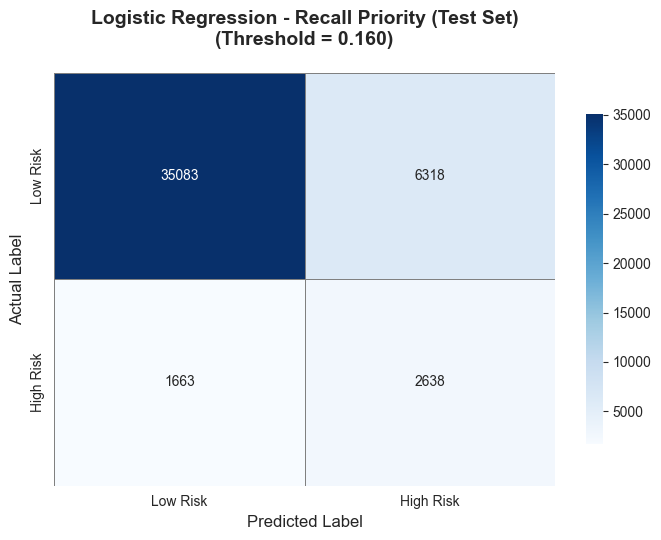

True Negatives  (Low Risk đúng):      35,083
False Positives (Cảnh báo nhầm):       6,318
False Negatives (Bỏ sót nguy cơ cao): 1,663
True Positives  (Phát hiện đúng):      2,638


{'Recall': 0.6133457335503372,
 'Precision': 0.2945511389012952,
 'F1-score': 0.39797842649166476,
 'ROC-AUC': 0.8300091801508703}

In [69]:
y_test_pred_recall = (y_test_proba_base >= best_t_recall).astype(int)

print("=== Logistic Regression (Recall-priority) - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_recall,
    title="Logistic Regression - Recall Priority (Test Set)",
    threshold=best_t_recall
)

metrics_recall_test = {
    "Recall": recall_score(y_test, y_test_pred_recall),
    "Precision": precision_score(y_test, y_test_pred_recall, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_recall, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_base)
}

metrics_recall_test

#### HIGHER RECALL

In [70]:
current_recall = metrics_recall_test["Recall"]
current_precision = metrics_recall_test["Precision"]
current_f1 = metrics_recall_test["F1-score"]

print(f"Current Recall:    {current_recall:.3f}")
print(f"Current Precision: {current_precision:.3f}")
print(f"Current F1-score:  {current_f1:.3f}")


Current Recall:    0.613
Current Precision: 0.295
Current F1-score:  0.398


In [71]:
relaxed_thresholds = df_threshold_base[
    (df_threshold_base["Precision"] >= 0.85 * current_precision) &
    (df_threshold_base["F1"] >= 0.90 * current_f1)
]

print(f"Số threshold thỏa điều kiện nới lỏng: {len(relaxed_thresholds)}")
display(relaxed_thresholds.sort_values("Recall", ascending=False).head(10))


Số threshold thỏa điều kiện nới lỏng: 9


,Threshold,Recall,Precision,F1
1,0.12,0.714252,0.255723,0.376609
2,0.14,0.664032,0.274933,0.388862
3,0.16,0.609858,0.294885,0.397545
4,0.18,0.562660,0.309107,0.399011
5,0.20,0.504766,0.324417,0.394979
6,0.22,0.462451,0.342164,0.393316
7,0.24,0.414555,0.358680,0.384599
8,0.26,0.372472,0.372992,0.372732
9,0.28,0.332016,0.389738,0.358569


In [72]:
best_more_recall_row = relaxed_thresholds.loc[
    relaxed_thresholds["Recall"].idxmax()
]

best_t_more_recall = best_more_recall_row["Threshold"]

print("=== HIGHER-RECALL THRESHOLD (RELAXED) ===")
print(best_more_recall_row)


=== HIGHER-RECALL THRESHOLD (RELAXED) ===
Threshold    0.120000
Recall       0.714252
Precision    0.255723
F1           0.376609
Name: 1, dtype: float64


=== Logistic Regression (Higher Recall) - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,32416,8985
Actual: High Risk,1228,3073


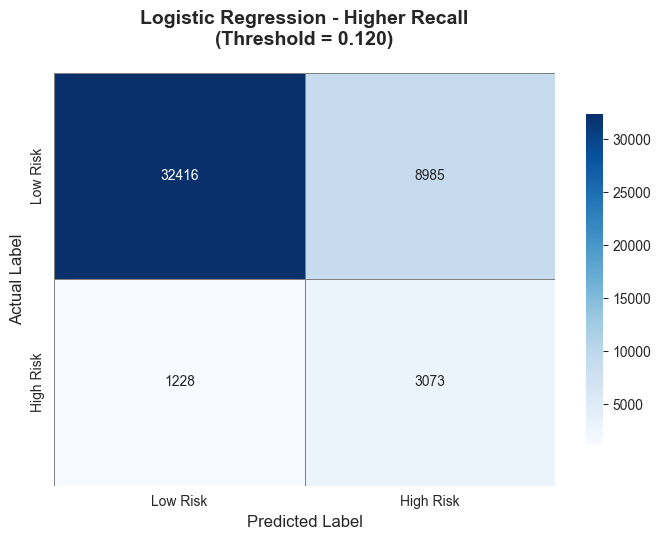

True Negatives  (Low Risk đúng):      32,416
False Positives (Cảnh báo nhầm):       8,985
False Negatives (Bỏ sót nguy cơ cao): 1,228
True Positives  (Phát hiện đúng):      3,073


{'Recall': 0.714485003487561,
 'Precision': 0.2548515508376182,
 'F1-score': 0.3756953359007274,
 'ROC-AUC': 0.8300091801508703}

In [73]:
y_test_pred_rf_recall = (y_test_proba_base >= best_t_more_recall).astype(int)

print("=== Logistic Regression (Higher Recall) - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_rf_recall,
    title="Logistic Regression - Higher Recall",
    threshold=best_t_more_recall
)

metrics_lo_recall_test = {
    "Recall": recall_score(y_test, y_test_pred_rf_recall),
    "Precision": precision_score(y_test, y_test_pred_rf_recall, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_rf_recall, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_base)
}

metrics_lo_recall_test


## Mô hình 2: Random Forest

### 1. Mục tiêu & lý do chọn mô hình
Random Forest là mô hình ensemble mạnh,
có khả năng học các mối quan hệ phi tuyến
và thường cho hiệu năng tốt trên dữ liệu dạng bảng.


#### Mô hình chưa xử lý mất cân bằng

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)
from sklearn.model_selection import GridSearchCV

In [75]:
rf_baseline = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

pipeline_rf_baseline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf_baseline)
])

param_grid_rf_fast = {
    "model__max_depth": [None, 20],
    "model__min_samples_leaf": [1, 5]
}

grid_rf_baseline = GridSearchCV(
    pipeline_rf_baseline,
    param_grid_rf_fast,
    cv=3,
    scoring="f1",
    n_jobs=-1,
    verbose=1
)

grid_rf_baseline.fit(X_train, y_train)

best_model_rf_baseline = grid_rf_baseline.best_estimator_

print("=== Random Forest (Baseline) ===")
print("Best params:", grid_rf_baseline.best_params_)
print(f"Best CV F1-score: {grid_rf_baseline.best_score_:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
=== Random Forest (Baseline) ===
Best params: {'model__max_depth': 20, 'model__min_samples_leaf': 1}
Best CV F1-score: 0.1746


In [76]:
y_val_proba_rf = best_model_rf_baseline.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.10, 0.71, 0.02)
results_rf = []

for t in thresholds:
    y_pred = (y_val_proba_rf >= t).astype(int)
    results_rf.append({
        "Threshold": round(t, 2),
        "Recall": recall_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred, zero_division=0),
        "F1": f1_score(y_val, y_pred, zero_division=0)
    })

df_threshold_rf = pd.DataFrame(results_rf)
best_t_rf = df_threshold_rf.loc[df_threshold_rf["F1"].idxmax(), "Threshold"]

print(f"Best Threshold (RF Baseline): {best_t_rf}")
display(df_threshold_rf)

Best Threshold (RF Baseline): 0.16


,Threshold,Recall,Precision,F1
0,0.10,0.664032,0.214737,0.324527
1,0.12,0.620786,0.224653,0.329915
2,0.14,0.586608,0.234785,0.335349
3,0.16,0.549175,0.242704,0.336635
4,0.18,0.505464,0.251679,0.336038
5,0.20,0.471053,0.261521,0.336321
6,0.22,0.438968,0.269099,0.333657
7,0.24,0.407812,0.275396,0.328772
8,0.26,0.374564,0.281939,0.321717
9,0.28,0.342944,0.289955,0.314231


#### Test-Set

=== Random Forest (Baseline) - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,34049,7352
Actual: High Risk,1919,2382


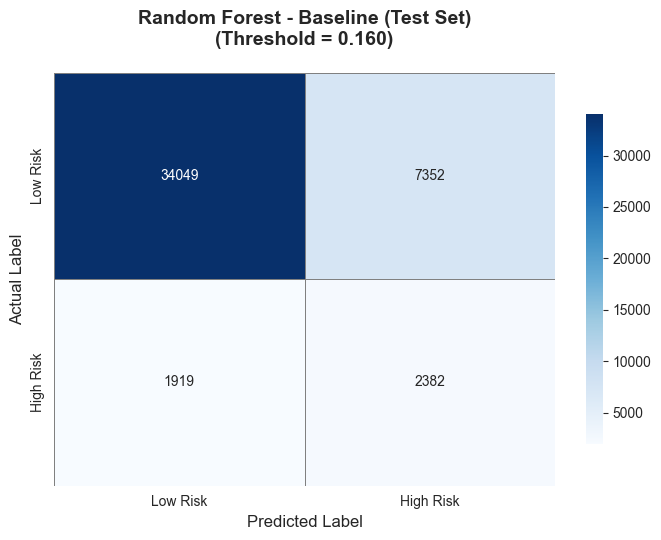

True Negatives  (Low Risk đúng):      34,049
False Positives (Cảnh báo nhầm):       7,352
False Negatives (Bỏ sót nguy cơ cao): 1,919
True Positives  (Phát hiện đúng):      2,382

--- Performance Metrics ---
Recall: 0.5538
Precision: 0.2447
F1-score: 0.3394
ROC-AUC: 0.7610


In [77]:
y_test_proba_rf = best_model_rf_baseline.predict_proba(X_test)[:, 1]
y_test_pred_rf = (y_test_proba_rf >= best_t_rf).astype(int)

print("=== Random Forest (Baseline) - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_rf,
    title="Random Forest - Baseline (Test Set)",
    threshold=best_t_rf
)

metrics_rf_test = {
    "Recall": recall_score(y_test, y_test_pred_rf),
    "Precision": precision_score(y_test, y_test_pred_rf, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_rf, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_rf)
}

print("\n--- Performance Metrics ---")
for k, v in metrics_rf_test.items():
    print(f"{k}: {v:.4f}")

#### Mô hình xử lý mất cân bằng

In [78]:
rf_balanced = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

pipeline_rf_balanced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", rf_balanced)
])

pipeline_rf_balanced.fit(X_train, y_train)

best_model_rf_balanced = pipeline_rf_balanced

print("=== Random Forest + class_weight ===")

=== Random Forest + class_weight ===


In [79]:
y_val_proba_rf_bal = best_model_rf_balanced.predict_proba(X_val)[:, 1]

results_rf_bal = []

for t in thresholds:
    y_pred = (y_val_proba_rf_bal >= t).astype(int)
    results_rf_bal.append({
        "Threshold": round(t, 2),
        "Recall": recall_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred, zero_division=0),
        "F1": f1_score(y_val, y_pred, zero_division=0)
    })

df_threshold_rf_bal = pd.DataFrame(results_rf_bal)
best_t_rf_bal = df_threshold_rf_bal.loc[
    df_threshold_rf_bal["F1"].idxmax(), "Threshold"
]

print(f"Best Threshold (RF + class_weight): {best_t_rf_bal}")
display(df_threshold_rf_bal)

Best Threshold (RF + class_weight): 0.62


,Threshold,Recall,Precision,F1
0,0.10,0.948617,0.137531,0.240233
1,0.12,0.937689,0.142559,0.247492
2,0.14,0.926994,0.147334,0.254257
3,0.16,0.919554,0.152679,0.261877
4,0.18,0.910253,0.157787,0.268952
5,0.20,0.900256,0.163417,0.276621
6,0.22,0.892583,0.167342,0.281844
7,0.24,0.882353,0.172375,0.288407
8,0.26,0.870263,0.176232,0.293109
9,0.28,0.859800,0.180849,0.298840


#### Test-Set

=== Random Forest + class_weight - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,35517,5884
Actual: High Risk,1940,2361


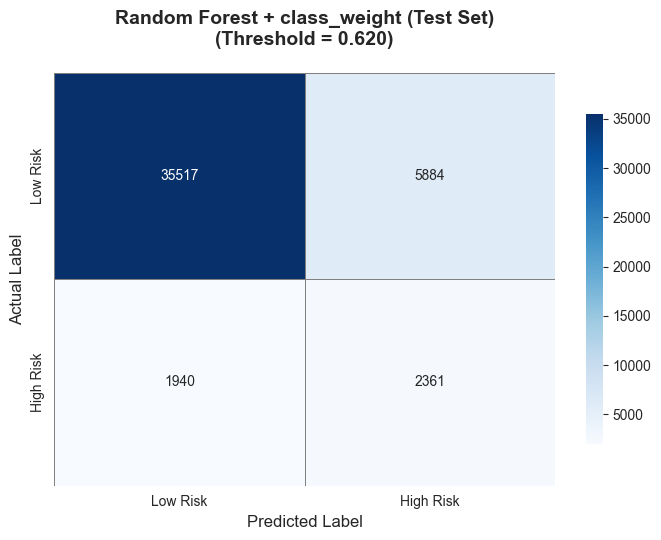

True Negatives  (Low Risk đúng):      35,517
False Positives (Cảnh báo nhầm):       5,884
False Negatives (Bỏ sót nguy cơ cao): 1,940
True Positives  (Phát hiện đúng):      2,361

--- Performance Metrics ---
Recall: 0.5489
Precision: 0.2864
F1-score: 0.3764
ROC-AUC: 0.8103


In [80]:
y_test_proba_rf_bal = best_model_rf_balanced.predict_proba(X_test)[:, 1]
y_test_pred_rf_bal = (y_test_proba_rf_bal >= best_t_rf_bal).astype(int)

print("=== Random Forest + class_weight - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_rf_bal,
    title="Random Forest + class_weight (Test Set)",
    threshold=best_t_rf_bal
)

metrics_rf_bal_test = {
    "Recall": recall_score(y_test, y_test_pred_rf_bal),
    "Precision": precision_score(y_test, y_test_pred_rf_bal, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_rf_bal, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_rf_bal)
}

print("\n--- Performance Metrics ---")
for k, v in metrics_rf_bal_test.items():
    print(f"{k}: {v:.4f}")


#### So Sánh Hai Phiên Bản 

In [81]:
comparison_rf = pd.DataFrame({
    "Model": [
        "Random Forest (Baseline)",
        "Random Forest (class_weight)"
    ],
    "Best Threshold": [
        best_t_rf,
        best_t_rf_bal
    ],
    "Recall": [
        metrics_rf_test["Recall"],
        metrics_rf_bal_test["Recall"]
    ],
    "Precision": [
        metrics_rf_test["Precision"],
        metrics_rf_bal_test["Precision"]
    ],
    "F1-score": [
        metrics_rf_test["F1-score"],
        metrics_rf_bal_test["F1-score"]
    ],
    "ROC-AUC": [
        metrics_rf_test["ROC-AUC"],
        metrics_rf_bal_test["ROC-AUC"]
    ]
})

print("=== SO SÁNH RANDOM FOREST TRÊN TẬP TEST ===")

display(
    comparison_rf.style
    .format({
        "Best Threshold": "{:.2f}",
        "Recall": "{:.3f}",
        "Precision": "{:.3f}",
        "F1-score": "{:.3f}",
        "ROC-AUC": "{:.3f}"
    })
    .highlight_max(subset=["Recall", "F1-score"], color="lightgreen")
)


=== SO SÁNH RANDOM FOREST TRÊN TẬP TEST ===


,Model,Best Threshold,Recall,Precision,F1-score,ROC-AUC
0,Random Forest (Baseline),0.16,0.554,0.245,0.339,0.761
1,Random Forest (class_weight),0.62,0.549,0.286,0.376,0.810


### Recall-priority Threshold Selection (Random Forest)

Trong bối cảnh sàng lọc bệnh tim, mục tiêu chính là
giảm thiểu số ca bệnh bị bỏ sót (False Negatives).

Do đó, threshold được lựa chọn nhằm:
- Tối đa hóa Recall
- Trong khi Precision và F1 vẫn ở mức chấp nhận được
để tránh quá nhiều cảnh báo nhầm gây quá tải hệ thống y tế.


#### Threshold đạt Recall cao nhất

In [82]:
y_val_proba_rf_bal = best_model_rf_balanced.predict_proba(X_val)[:, 1]

threshold_candidates = np.arange(0.05, 0.51, 0.01)

records = []

for t in threshold_candidates:
    y_pred = (y_val_proba_rf_bal >= t).astype(int)

    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)

    records.append({
        "Threshold": round(t, 2),
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

df_recall_priority_rf = pd.DataFrame(records)
display(df_recall_priority_rf.head())

,Threshold,Recall,Precision,F1
0,0.05,0.975122,0.123172,0.218717
1,0.06,0.969774,0.126886,0.224410
2,0.07,0.964427,0.130064,0.229216
3,0.08,0.957219,0.132558,0.232869
4,0.09,0.953499,0.134906,0.236369


In [83]:
MIN_RECALL = 0.82
MIN_PRECISION = 0.17

df_candidate = df_recall_priority_rf[
    (df_recall_priority_rf["Recall"] >= MIN_RECALL) &
    (df_recall_priority_rf["Precision"] >= MIN_PRECISION)
]

df_candidate_sorted = df_candidate.sort_values(
    by=["Recall", "F1"],
    ascending=False
)

display(df_candidate_sorted.head(10))


,Threshold,Recall,Precision,F1
19,0.24,0.882353,0.172375,0.288407
20,0.25,0.878400,0.174367,0.290974
21,0.26,0.870263,0.176232,0.293109
22,0.27,0.864683,0.178970,0.296559
23,0.28,0.859800,0.180849,0.298840
24,0.29,0.852592,0.183258,0.301674
25,0.30,0.847012,0.186133,0.305198
26,0.31,0.840967,0.189550,0.309370
27,0.32,0.834457,0.192471,0.312794
28,0.33,0.827482,0.195356,0.316089


In [84]:
best_t_rf_recall = df_candidate_sorted.iloc[0]["Threshold"]

print(f"Selected Threshold (Recall-priority RF): {best_t_rf_recall}")

Selected Threshold (Recall-priority RF): 0.24


#### Đánh giá trên Test Set (Recall-priority)

=== Random Forest (Recall-priority) - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,23116,18285
Actual: High Risk,521,3780


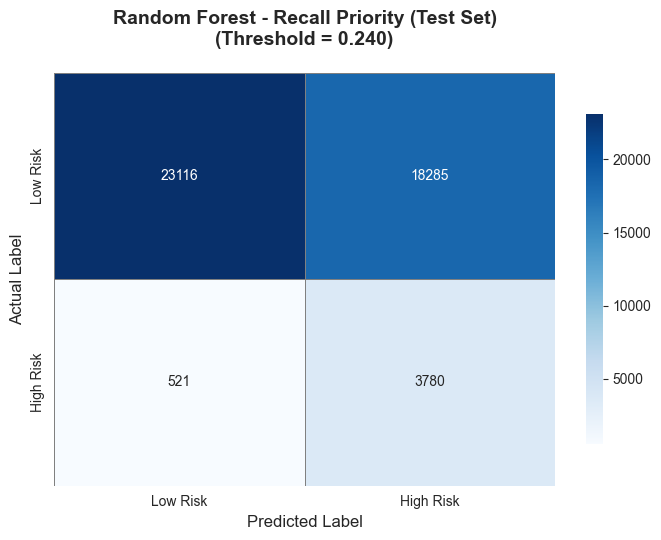

True Negatives  (Low Risk đúng):      23,116
False Positives (Cảnh báo nhầm):       18,285
False Negatives (Bỏ sót nguy cơ cao): 521
True Positives  (Phát hiện đúng):      3,780

--- Performance Metrics (Recall-priority) ---
Recall: 0.8789
Precision: 0.1713
F1-score: 0.2867
ROC-AUC: 0.8103


In [85]:
y_test_proba_rf_recall = best_model_rf_balanced.predict_proba(X_test)[:, 1]
y_test_pred_rf_recall = (y_test_proba_rf_recall >= best_t_rf_recall).astype(int)

print("=== Random Forest (Recall-priority) - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_rf_recall,
    title="Random Forest - Recall Priority (Test Set)",
    threshold=best_t_rf_recall
)

metrics_rf_recall_test = {
    "Recall": recall_score(y_test, y_test_pred_rf_recall),
    "Precision": precision_score(y_test, y_test_pred_rf_recall, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_rf_recall, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_rf_recall)
}

print("\n--- Performance Metrics (Recall-priority) ---")
for k, v in metrics_rf_recall_test.items():
    print(f"{k}: {v:.4f}")

## Mô hình 3: XGBoost

### 1. Mục tiêu & lý do chọn mô hình
XGBoost là mô hình boosting hiện đại,
phù hợp với dữ liệu mất cân bằng
và yêu cầu hiệu năng cao trong dự đoán.


In [86]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

In [87]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

pipeline_xgb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

In [88]:
pipeline_xgb.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('ordinal', ...), ('nominal', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different tr

In [89]:
y_val_proba_xgb = pipeline_xgb.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.05, 0.71, 0.02)
results_xgb = []

for t in thresholds:
    y_pred = (y_val_proba_xgb >= t).astype(int)
    results_xgb.append({
        "Threshold": round(t, 2),
        "Recall": recall_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred, zero_division=0),
        "F1": f1_score(y_val, y_pred, zero_division=0)
    })

df_threshold_xgb = pd.DataFrame(results_xgb)
best_t_xgb = df_threshold_xgb.loc[df_threshold_xgb["F1"].idxmax(), "Threshold"]

print(f"Best Threshold (XGBoost): {best_t_xgb}")
display(df_threshold_xgb)

Best Threshold (XGBoost): 0.21


,Threshold,Recall,Precision,F1
0,0.05,0.902116,0.180557,0.300892
1,0.07,0.856777,0.200261,0.324641
2,0.09,0.807254,0.220025,0.345800
3,0.11,0.758893,0.238370,0.362788
4,0.13,0.717508,0.255908,0.377262
5,0.15,0.667984,0.274272,0.388874
6,0.17,0.619856,0.288684,0.393913
7,0.19,0.571728,0.302534,0.395688
8,0.21,0.528714,0.317642,0.396859
9,0.23,0.483376,0.333976,0.395022


#### Test-Set

=== XGBoost (Threshold tuned on Validation) - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,36505,4896
Actual: High Risk,2012,2289


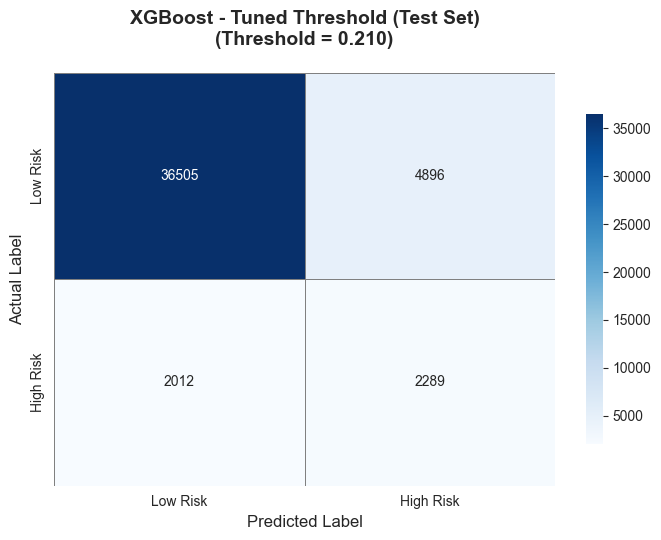

True Negatives  (Low Risk đúng):      36,505
False Positives (Cảnh báo nhầm):       4,896
False Negatives (Bỏ sót nguy cơ cao): 2,012
True Positives  (Phát hiện đúng):      2,289

--- Performance Metrics ---
Recall: 0.5322
Precision: 0.3186
F1-score: 0.3986
ROC-AUC: 0.8303


In [90]:
y_test_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]
y_test_pred_xgb = (y_test_proba_xgb >= best_t_xgb).astype(int)

print("=== XGBoost (Threshold tuned on Validation) - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_xgb,
    title="XGBoost - Tuned Threshold (Test Set)",
    threshold=best_t_xgb
)

metrics_xgb_test = {
    "Recall": recall_score(y_test, y_test_pred_xgb),
    "Precision": precision_score(y_test, y_test_pred_xgb, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_xgb, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_xgb)
}

print("\n--- Performance Metrics ---")
for k, v in metrics_xgb_test.items():
    print(f"{k}: {v:.4f}")

#### High Recall

In [91]:
y_val_proba_xgb = pipeline_xgb.predict_proba(X_val)[:, 1]

thresholds = np.arange(0.05, 0.51, 0.02) 
results_xgb_recall = []

for t in thresholds:
    y_pred = (y_val_proba_xgb >= t).astype(int)
    results_xgb_recall.append({
        "Threshold": round(t, 2),
        "Recall": recall_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred, zero_division=0),
        "F1": f1_score(y_val, y_pred, zero_division=0)
    })

df_xgb_recall = pd.DataFrame(results_xgb_recall)

print("=== High Recall Threshold Search (XGBoost - Validation) ===")
display(df_xgb_recall)

=== High Recall Threshold Search (XGBoost - Validation) ===


,Threshold,Recall,Precision,F1
0,0.05,0.902116,0.180557,0.300892
1,0.07,0.856777,0.200261,0.324641
2,0.09,0.807254,0.220025,0.345800
3,0.11,0.758893,0.238370,0.362788
4,0.13,0.717508,0.255908,0.377262
5,0.15,0.667984,0.274272,0.388874
6,0.17,0.619856,0.288684,0.393913
7,0.19,0.571728,0.302534,0.395688
8,0.21,0.528714,0.317642,0.396859
9,0.23,0.483376,0.333976,0.395022


In [92]:
MIN_RECALL = 0.83
MIN_PRECISION = 0.15

df_candidate = df_xgb_recall[
    (df_xgb_recall["Recall"] >= MIN_RECALL) &
    (df_xgb_recall["Precision"] >= MIN_PRECISION)
]

df_candidate_sorted = df_candidate.sort_values(
    by=["Recall", "F1"],
    ascending=False
)

display(df_candidate_sorted.head(10))

,Threshold,Recall,Precision,F1
0,0.05,0.902116,0.180557,0.300892
1,0.07,0.856777,0.200261,0.324641


In [93]:
best_t_xgb_recall = df_candidate_sorted.iloc[0]["Threshold"]

print(f"Selected Threshold (Recall-priority XGBoost): {best_t_xgb_recall}")

Selected Threshold (Recall-priority XGBoost): 0.05


=== XGBoost (High Recall) - Test Set ===
=== Confusion Matrix (Heart Disease Risk Screening) ===


,Predicted: Low Risk,Predicted: High Risk
Actual: Low Risk,23799,17602
Actual: High Risk,429,3872


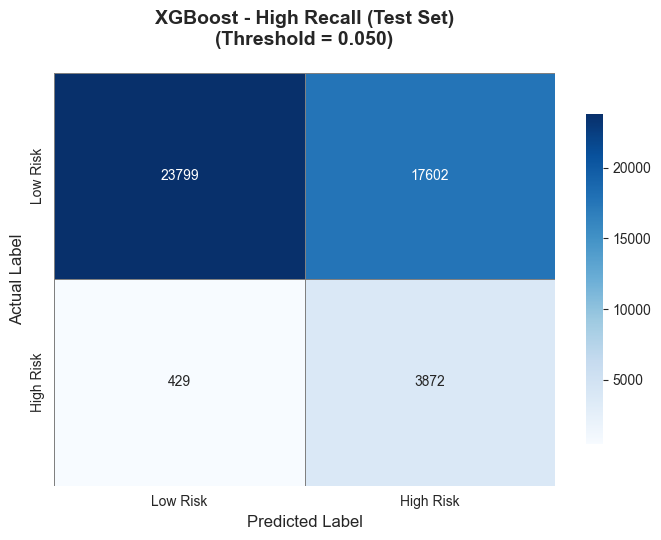

True Negatives  (Low Risk đúng):      23,799
False Positives (Cảnh báo nhầm):       17,602
False Negatives (Bỏ sót nguy cơ cao): 429
True Positives  (Phát hiện đúng):      3,872

--- Performance Metrics (High Recall) ---
Recall: 0.9003
Precision: 0.1803
F1-score: 0.3004
ROC-AUC: 0.8303


In [94]:
y_test_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]
y_test_pred_xgb_recall = (y_test_proba_xgb >= best_t_xgb_recall).astype(int)

print("=== XGBoost (High Recall) - Test Set ===")

plot_confusion_matrix(
    y_test,
    y_test_pred_xgb_recall,
    title="XGBoost - High Recall (Test Set)",
    threshold=best_t_xgb_recall
)

metrics_xgb_recall_test = {
    "Recall": recall_score(y_test, y_test_pred_xgb_recall),
    "Precision": precision_score(y_test, y_test_pred_xgb_recall, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred_xgb_recall, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba_xgb)
}

print("\n--- Performance Metrics (High Recall) ---")
for k, v in metrics_xgb_recall_test.items():
    print(f"{k}: {v:.4f}")

## So sánh các mô hình


In [95]:
comparison_high_recall = pd.DataFrame({
    "Model": [
        "Logistic Regression (High Recall)",
        "Random Forest (High Recall)",
        "XGBoost (High Recall)"
    ],
    "Threshold (Val)": [
        best_t_more_recall,
        best_t_rf_recall,
        best_t_xgb_recall
    ],
    "Recall": [
        metrics_lo_recall_test["Recall"],
        metrics_rf_recall_test["Recall"],
        metrics_xgb_recall_test["Recall"]
    ],
    "Precision": [
        metrics_lo_recall_test["Precision"],
        metrics_rf_recall_test["Precision"],
        metrics_xgb_recall_test["Precision"]
    ],
    "F1-score": [
        metrics_lo_recall_test["F1-score"],
        metrics_rf_recall_test["F1-score"],
        metrics_xgb_recall_test["F1-score"]
    ],
    "ROC-AUC": [
        metrics_lo_recall_test["ROC-AUC"],
        metrics_rf_recall_test["ROC-AUC"],
        metrics_xgb_recall_test["ROC-AUC"]
    ]
})

display(
    comparison_high_recall
    .style
    .format({
        "Threshold (Val)": "{:.2f}",
        "Recall": "{:.3f}",
        "Precision": "{:.3f}",
        "F1-score": "{:.3f}",
        "ROC-AUC": "{:.3f}"
    })
    .highlight_max(subset=["Recall"], color="black")
    .highlight_max(subset=["F1-score"], color="black")
)

,Model,Threshold (Val),Recall,Precision,F1-score,ROC-AUC
0,Logistic Regression (High Recall),0.12,0.714,0.255,0.376,0.830
1,Random Forest (High Recall),0.24,0.879,0.171,0.287,0.810
2,XGBoost (High Recall),0.05,0.900,0.180,0.300,0.830


### Đánh giá tổng hợp các mô hình ở chế độ **High Recall**

Bảng trên trình bày kết quả **so sánh 3 mô hình (Logistic Regression, Random Forest, XGBoost)**  
sau khi **điều chỉnh threshold trên tập Validation với mục tiêu ưu tiên Recall**,  
sau đó **đánh giá trên tập Test** để đảm bảo tính khách quan.

#### 🔹 Nhận xét chi tiết theo từng tiêu chí

**1. Recall (Tiêu chí ưu tiên chính)**  
- **XGBoost** đạt Recall cao nhất (**0.900**), cho thấy khả năng **phát hiện gần như toàn bộ các ca nguy cơ cao**.
- **Random Forest** đứng thứ hai (**0.879**), mức Recall rất tốt và ổn định.
- **Logistic Regression** có Recall thấp hơn (**0.714**), phù hợp hơn cho baseline hoặc mô hình giải thích.

👉 Trong bối cảnh **sàng lọc y tế**, Recall cao đồng nghĩa với **giảm tối đa bỏ sót bệnh nhân**,  
do đó XGBoost và Random Forest thể hiện ưu thế rõ rệt.

---

**2. Precision & F1-score (Hệ quả tất yếu của High Recall)**  
- Cả ba mô hình đều có **Precision thấp (0.17–0.25)**, phản ánh số lượng **false positive tăng mạnh** khi hạ threshold.
- **XGBoost** vẫn giữ được **F1-score cao nhất (0.300)**, cho thấy **cân bằng tốt hơn** giữa Recall và Precision.
- Random Forest có F1 thấp nhất, cho thấy cái giá phải trả lớn hơn khi đẩy Recall lên rất cao.

👉 Đây là **trade-off có chủ đích**, được chấp nhận trong bài toán screening ban đầu.

---

**3. ROC-AUC (Năng lực phân biệt tổng thể)**  
- Logistic Regression và XGBoost cùng đạt **ROC-AUC ≈ 0.83**, cho thấy năng lực phân biệt tốt và ổn định.
- Random Forest thấp hơn một chút (**0.81**), nhưng vẫn ở mức chấp nhận được.

👉 ROC-AUC cao xác nhận rằng **việc hạ threshold không làm mất bản chất phân biệt của mô hình**.

---

####  Kết luận theo ngữ cảnh ứng dụng

| Ngữ cảnh sử dụng | Mô hình phù hợp |
|------------------|-----------------|
| **Screening ban đầu (cộng đồng, online, tiền khám)** | **XGBoost (High Recall)** |
| **Hỗ trợ bác sĩ, giảm tải bỏ sót nhưng cần cân nhắc FP** | **Random Forest (High Recall)** |
| **Baseline, giải thích, báo cáo khoa học** | **Logistic Regression** |

➡️ **XGBoost (High Recall)** được lựa chọn là **mô hình tối ưu nhất cho bài toán sàng lọc**,  
vì đạt Recall cao nhất trong khi F1-score và ROC-AUC vẫn được duy trì ở mức tốt.

---



#### Lưu Model

In [96]:
import joblib

In [97]:
logreg_high_recall_bundle = {
    "model_name": "Logistic Regression",
    "pipeline": best_model_baseline,   
    "threshold": best_t_more_recall,
    "mode": "high_recall",
    "notes": "High recall screening model"
}

joblib.dump(
    logreg_high_recall_bundle,
    "logistic_regression_high_recall.pkl"
)

print("✅ Logistic Regression (High Recall) exported")

✅ Logistic Regression (High Recall) exported


In [100]:
joblib.dump(
    logreg_high_recall_bundle,
    "logistic_regression_high_recall_bundle.pkl"
)

print("✅ Logistic Regression bundle exported")

✅ Logistic Regression bundle exported


In [98]:
rf_high_recall_bundle = {
    "model_name": "Random Forest",
    "pipeline": best_model_rf_balanced,
    "threshold": best_t_rf_recall,
    "mode": "high_recall",
    "notes": "High recall screening model"
}

joblib.dump(
    rf_high_recall_bundle,
    "random_forest_high_recall.pkl"
)

print("✅ Random Forest (High Recall) exported")

✅ Random Forest (High Recall) exported


In [99]:
xgb_high_recall_bundle = {
    "model_name": "XGBoost",
    "pipeline": pipeline_xgb,
    "threshold": best_t_xgb_recall,
    "mode": "high_recall",
    "notes": "High recall screening model"
}

joblib.dump(
    xgb_high_recall_bundle,
    "xgboost_high_recall.pkl"
)

print("✅ XGBoost (High Recall) exported")

✅ XGBoost (High Recall) exported
